<a href="https://colab.research.google.com/github/dinasoffa/Unsubervised_ML/blob/main/DBSCAN%26K_means%26AgglomerativeClustering%26GaussianMixture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns

# DBSCAN with Multiple Data Sets

Read [here](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf) if math excites you.

## Dataset 1

In [ ]:
d1 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM1.csv")

d1.head()



x         y
0  1.206087  1.847686
1  0.351919  0.245691
2  1.201688  0.630774
3  0.733710  1.364328
4  1.150745  0.724892

In [ ]:
ep=[]

In [ ]:
# dbscan and plot
#for i in range(len(ep_min))
scan = DBSCAN(eps = 0.0375, min_samples = 3).fit(d1)  
# Labelling the clusters we have created in the dataset 
db_scan=d1.copy() 
db_scan["cluster"]=scan.labels_
avg=silhouette_score(d1, db_scan["cluster"])
db_scan.head()

x         y  cluster
0  1.206087  1.847686       -1
1  0.351919  0.245691       -1
2  1.201688  0.630774       -1
3  0.733710  1.364328       -1
4  1.150745  0.724892       -1

In [ ]:
avg

-0.18372101471304764

In [ ]:


db_scan.cluster.value_counts().to_frame()



cluster
-1      197
 0        3

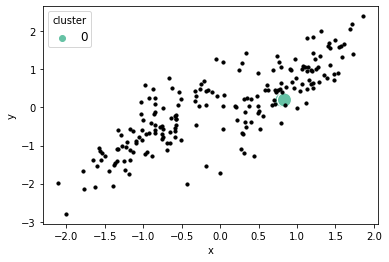

In [ ]:
outliers = db_scan[db_scan['cluster']==-1]

fig,(axes) = plt.subplots(1,1)
axes.legend()
sns.scatterplot('x', 'y',data=db_scan[db_scan['cluster']!=-1], hue='cluster', ax=axes, palette='Set2', legend='full', s=200)
axes.scatter(outliers['x'], outliers['y'], s=10, label='outliers', c="k")
plt.setp(axes.get_legend().get_texts(), fontsize='12')
plt.show()


For epsonlle = 0.5 and the minuium point = 9 The average silhouette_score is : 0.2279744737528749


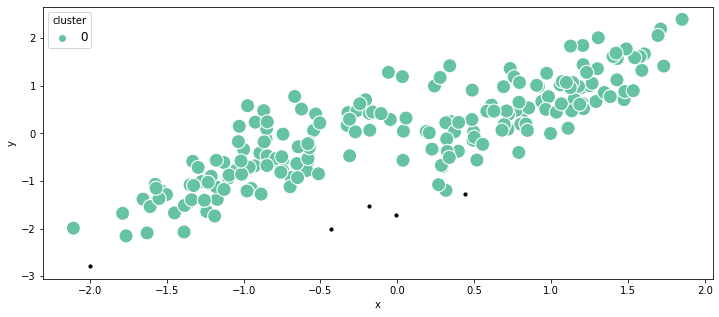

For epsonlle = 0.4 and the minuium point = 9 The average silhouette_score is : 0.2520062523872406


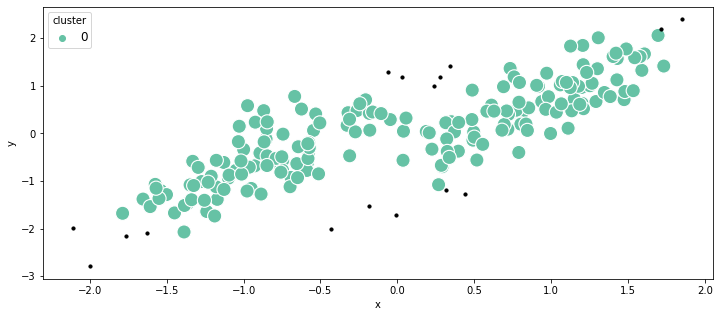

For epsonlle = 0.3 and the minuium point = 9 The average silhouette_score is : 0.19886218828584273


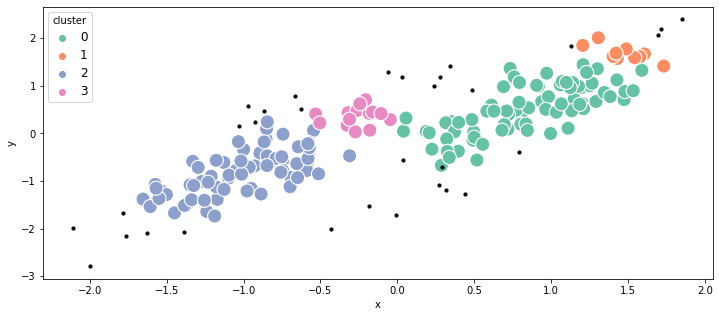

For epsonlle = 0.2 and the minuium point = 9 The average silhouette_score is : -0.20878183942933337


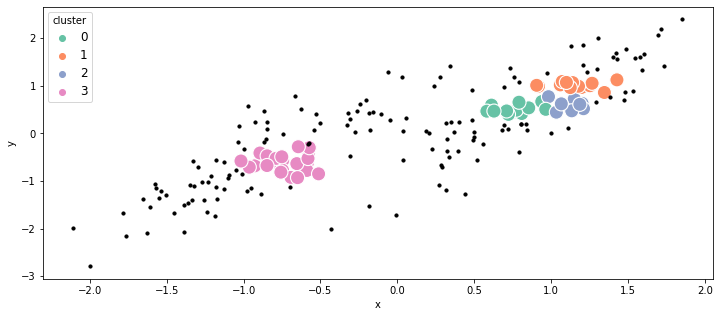

For epsonlle = 0.5 and the minuium point = 8 The average silhouette_score is : 0.2279744737528749


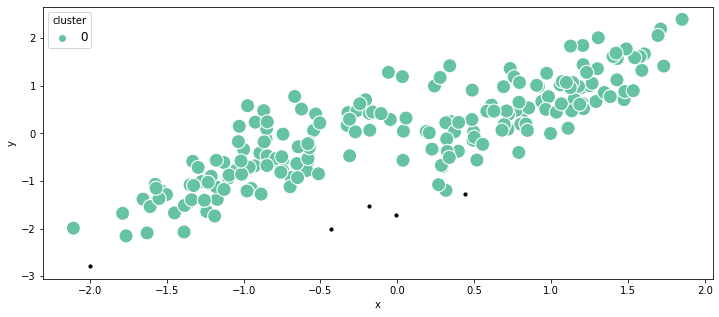

For epsonlle = 0.4 and the minuium point = 8 The average silhouette_score is : 0.2813661103861398


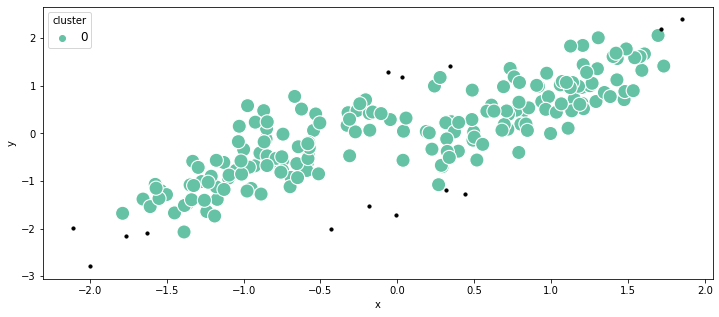

For epsonlle = 0.3 and the minuium point = 8 The average silhouette_score is : 0.2039198854021758


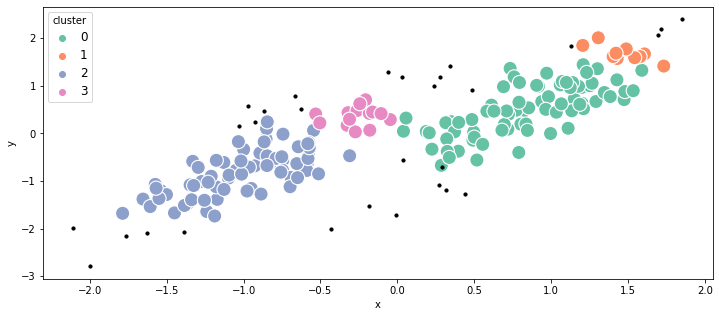

For epsonlle = 0.2 and the minuium point = 8 The average silhouette_score is : -0.06773735028004525


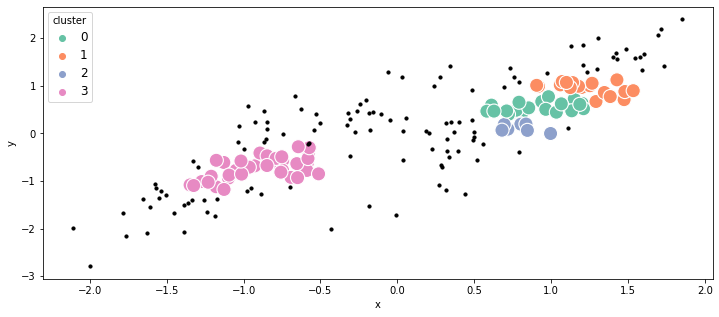

For epsonlle = 0.5 and the minuium point = 7 The average silhouette_score is : 0.2279744737528749


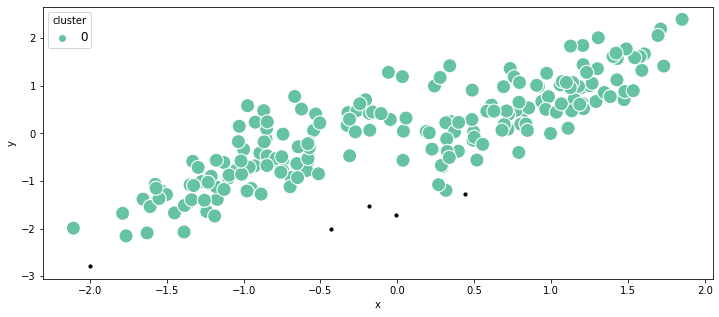

For epsonlle = 0.4 and the minuium point = 7 The average silhouette_score is : 0.2923915423791819


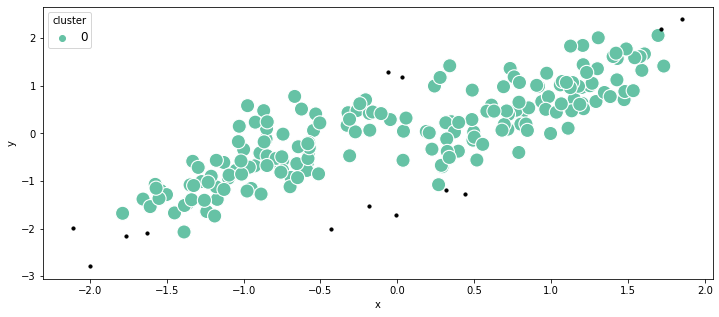

For epsonlle = 0.3 and the minuium point = 7 The average silhouette_score is : 0.19102275449227715


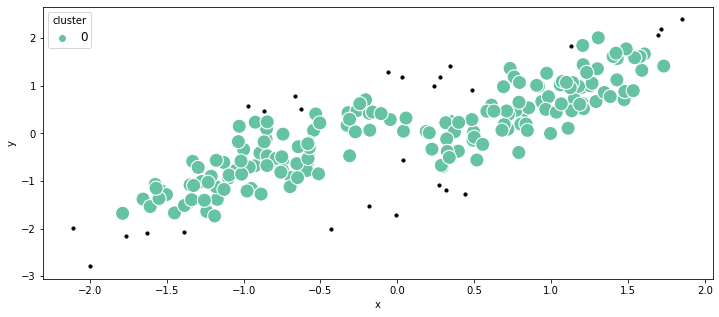

For epsonlle = 0.2 and the minuium point = 7 The average silhouette_score is : -0.032107034971043745


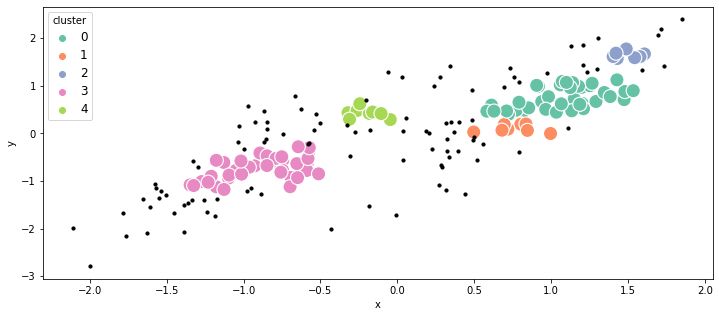

For epsonlle = 0.5 and the minuium point = 6 The average silhouette_score is : 0.2279744737528749


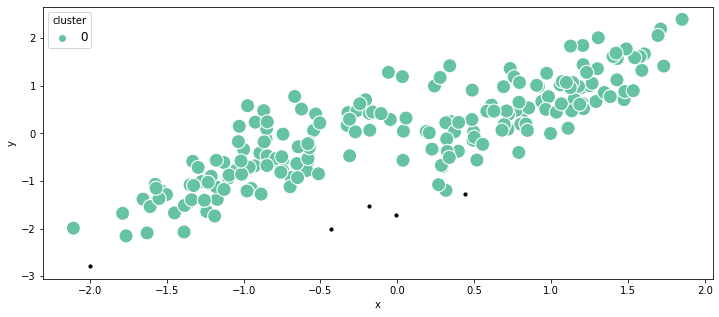

For epsonlle = 0.4 and the minuium point = 6 The average silhouette_score is : 0.27092224205064136


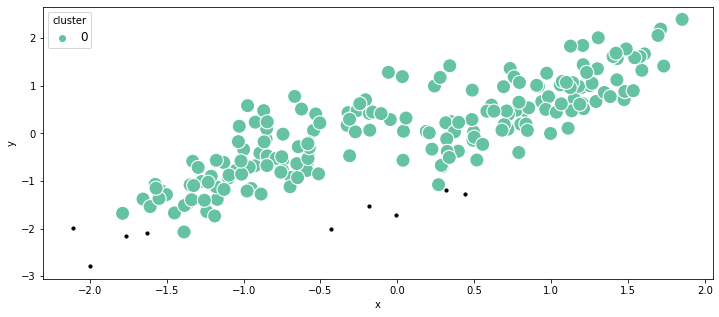

For epsonlle = 0.3 and the minuium point = 6 The average silhouette_score is : 0.23490983973517415


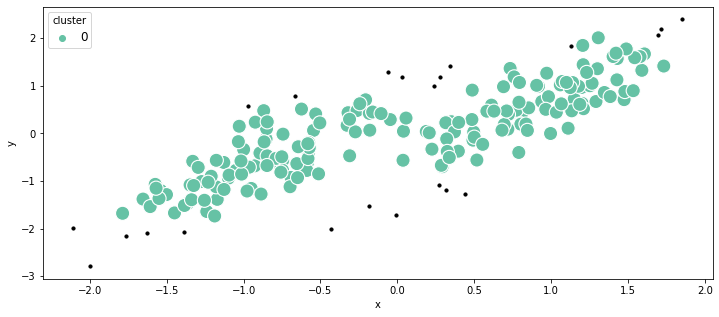

For epsonlle = 0.2 and the minuium point = 6 The average silhouette_score is : 0.022114065780255817


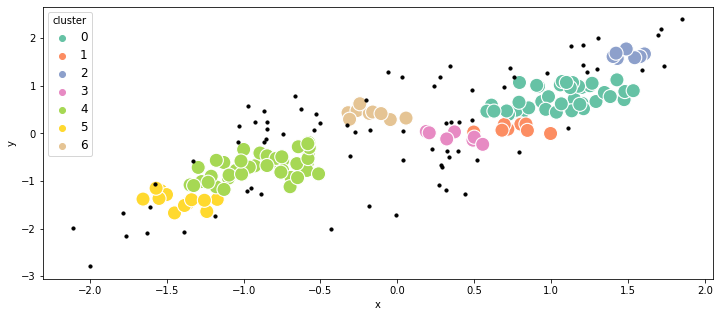

For epsonlle = 0.5 and the minuium point = 5 The average silhouette_score is : 0.24825776725141807


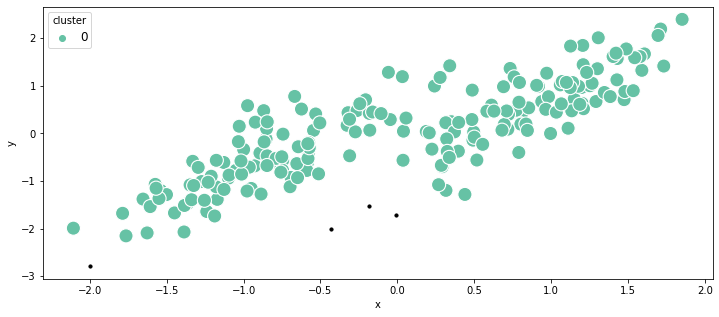

For epsonlle = 0.4 and the minuium point = 5 The average silhouette_score is : 0.27092224205064136


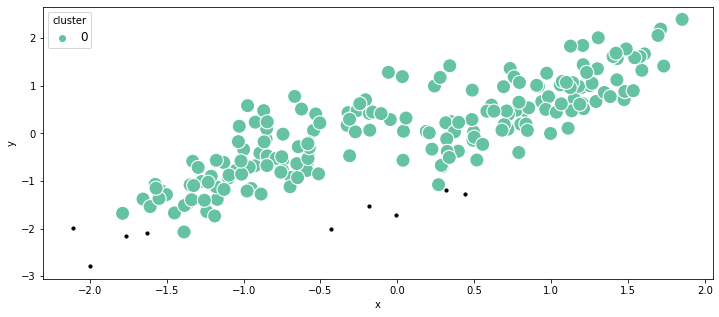

For epsonlle = 0.3 and the minuium point = 5 The average silhouette_score is : 0.24435025772377536


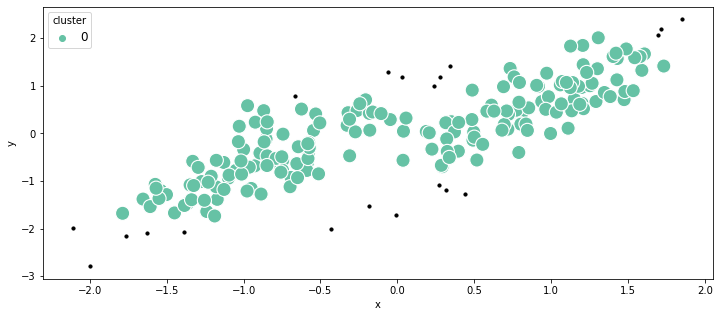

For epsonlle = 0.2 and the minuium point = 5 The average silhouette_score is : 0.11128284665122255


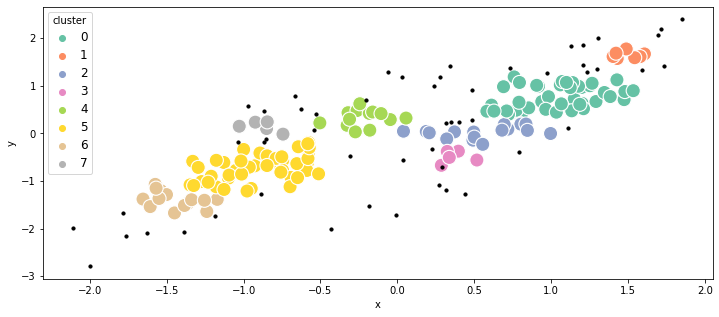

For epsonlle = 0.5 and the minuium point = 4 The average silhouette_score is : 0.24825776725141807


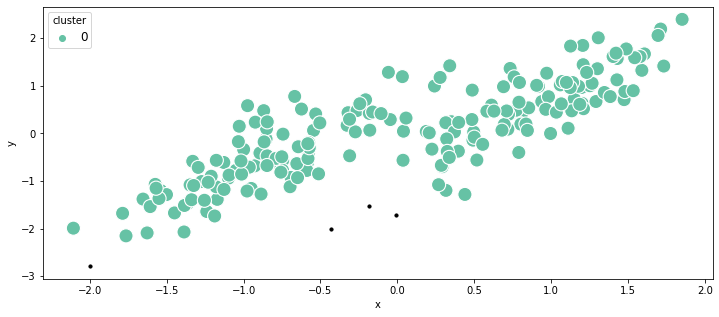

For epsonlle = 0.4 and the minuium point = 4 The average silhouette_score is : 0.24825776725141807


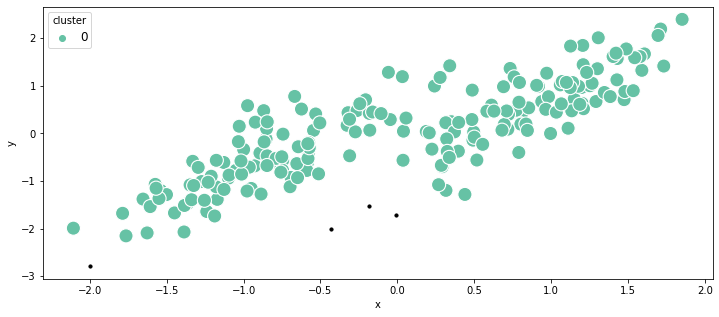

For epsonlle = 0.3 and the minuium point = 4 The average silhouette_score is : -0.05806447290090665


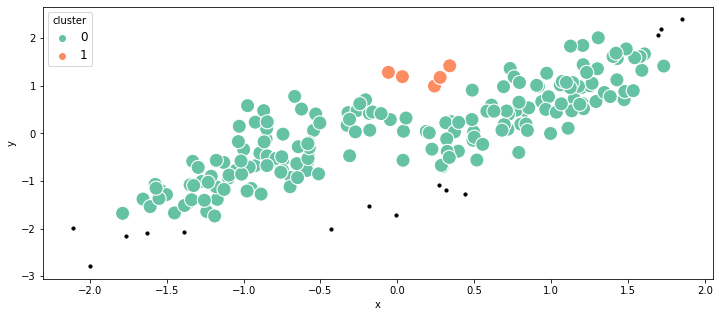

For epsonlle = 0.2 and the minuium point = 4 The average silhouette_score is : 0.09083828239222046


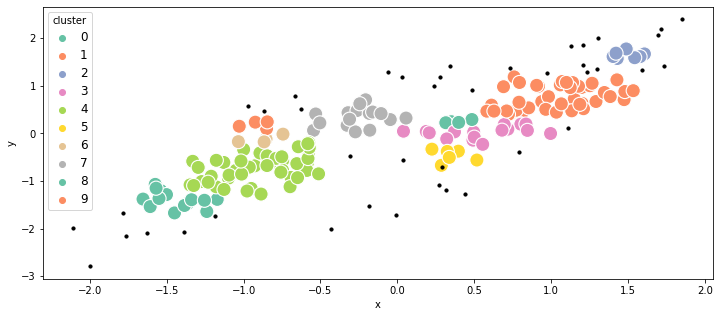

In [ ]:
# grab only clustered data points
for min_ in range(9,3,-1):
  for i in range(5,1,-1):
    scan = DBSCAN(eps = i/10, min_samples = min_).fit(d1)
    db_scan=d1.copy() 
    db_scan["cluster"]=scan.labels_
    avg=silhouette_score(d1, db_scan["cluster"]) 
    print("For epsonlle =", i/10,"and the minuium point =",min_ ,"The average silhouette_score is :", avg)

    #vistualize
    outliers = db_scan[db_scan['cluster']==-1]
    fig,(axes) = plt.subplots(1,1,figsize=(12,5))
    axes.legend()
    sns.scatterplot('x', 'y',data=db_scan[db_scan['cluster']!=-1], hue='cluster', ax=axes, palette='Set2', legend='full', s=200)
    axes.scatter(outliers['x'], outliers['y'], s=10, label='outliers', c="k")
    plt.setp(axes.get_legend().get_texts(), fontsize='12')
    plt.show()





In [ ]:
# overall 


## Dataset 2

In [ ]:
d2 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM2.csv")



For epsonlle = 0.5 and the minuium point = 9 The average silhouette_score is : 0.23483834241839147


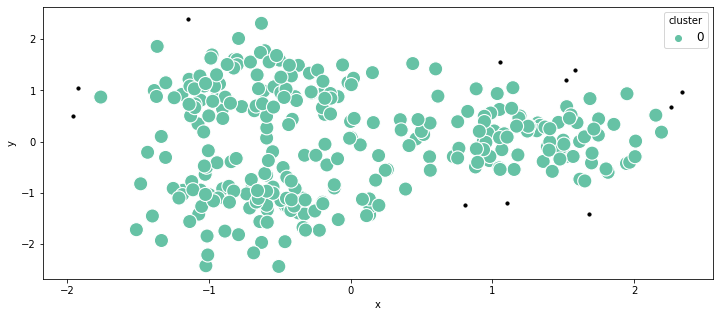

For epsonlle = 0.4 and the minuium point = 9 The average silhouette_score is : 0.33243337668390976


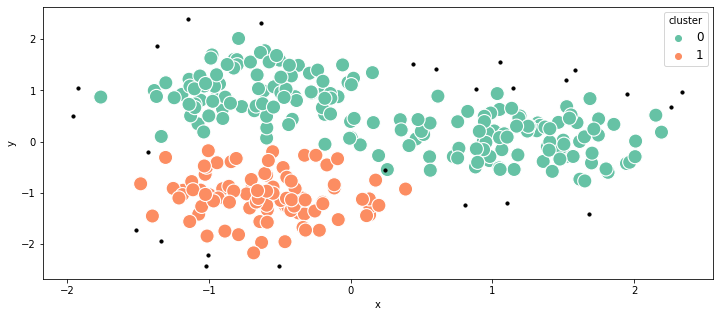

For epsonlle = 0.3 and the minuium point = 9 The average silhouette_score is : 0.34498562241214653


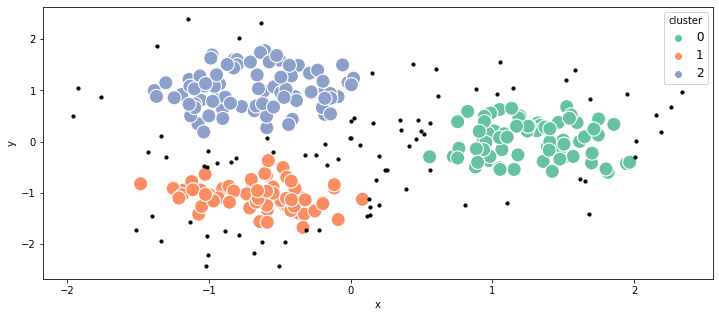

For epsonlle = 0.2 and the minuium point = 9 The average silhouette_score is : -0.17092766924175162


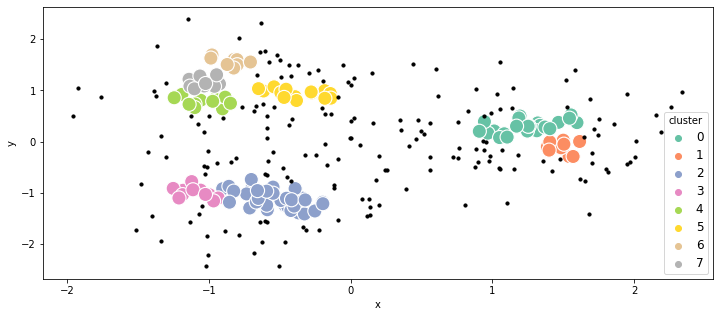

For epsonlle = 0.5 and the minuium point = 8 The average silhouette_score is : 0.24107796342793292


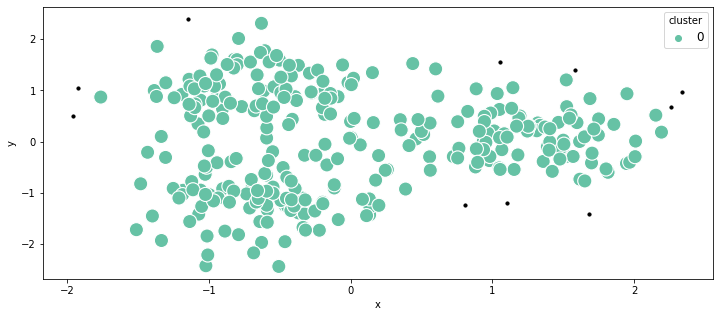

For epsonlle = 0.4 and the minuium point = 8 The average silhouette_score is : 0.2410772816742126


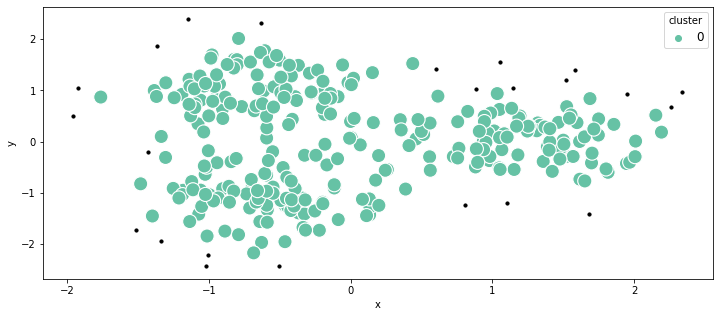

For epsonlle = 0.3 and the minuium point = 8 The average silhouette_score is : 0.24662654814263987


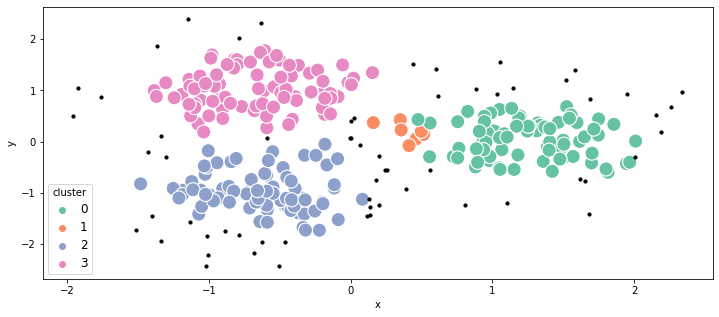

For epsonlle = 0.2 and the minuium point = 8 The average silhouette_score is : -0.07492558967616818


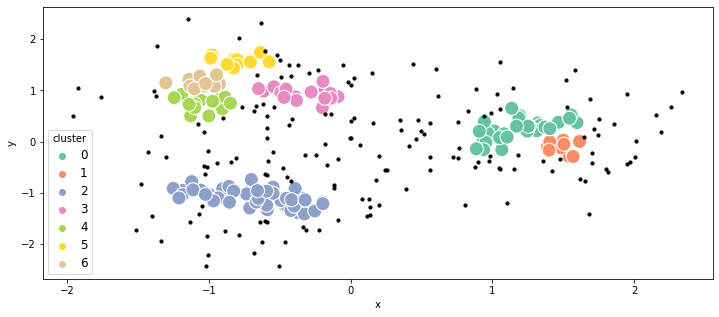

For epsonlle = 0.5 and the minuium point = 7 The average silhouette_score is : 0.2259774529149208


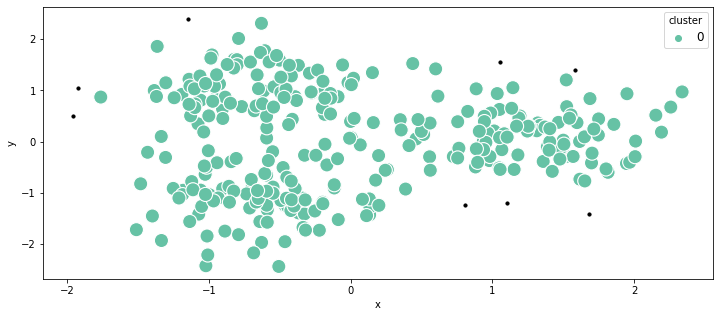

For epsonlle = 0.4 and the minuium point = 7 The average silhouette_score is : 0.2410772816742126


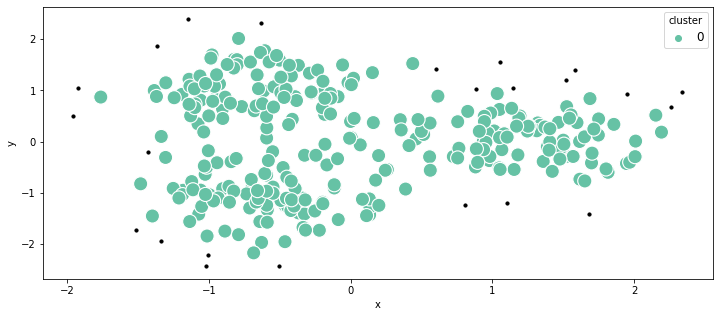

For epsonlle = 0.3 and the minuium point = 7 The average silhouette_score is : 0.42515927650666296


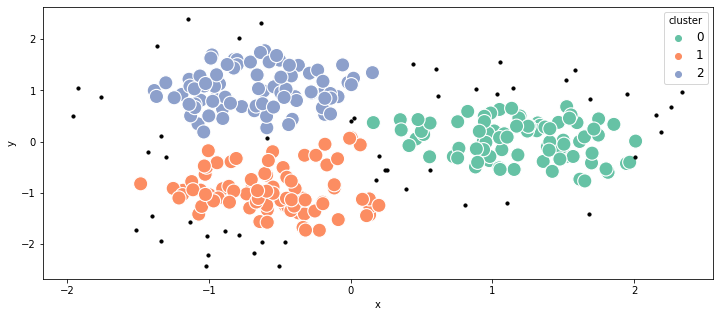

For epsonlle = 0.2 and the minuium point = 7 The average silhouette_score is : -0.043086840873503625


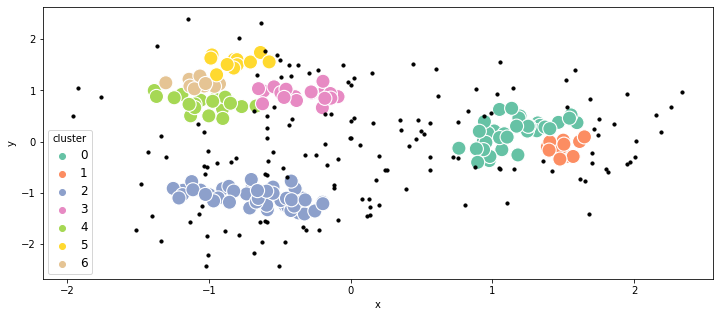

For epsonlle = 0.5 and the minuium point = 6 The average silhouette_score is : 0.2259774529149208


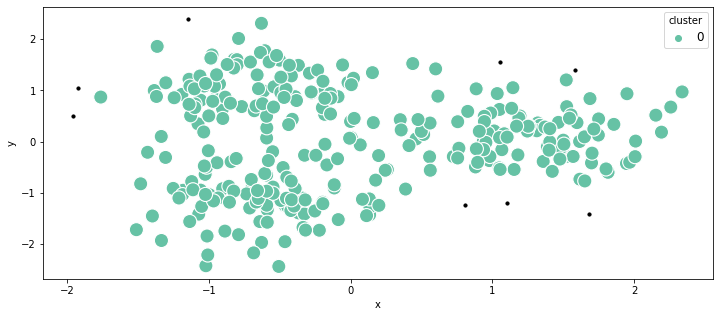

For epsonlle = 0.4 and the minuium point = 6 The average silhouette_score is : 0.24862022960887137


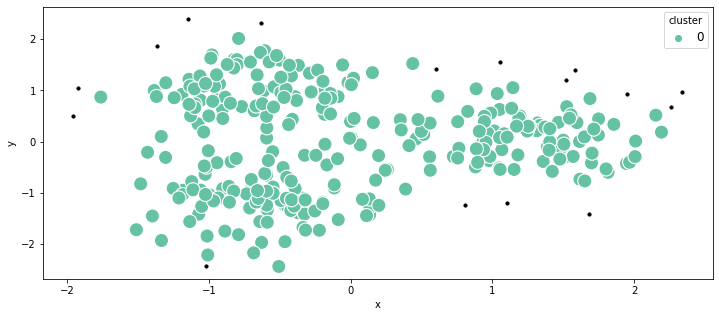

For epsonlle = 0.3 and the minuium point = 6 The average silhouette_score is : 0.30110101940265016


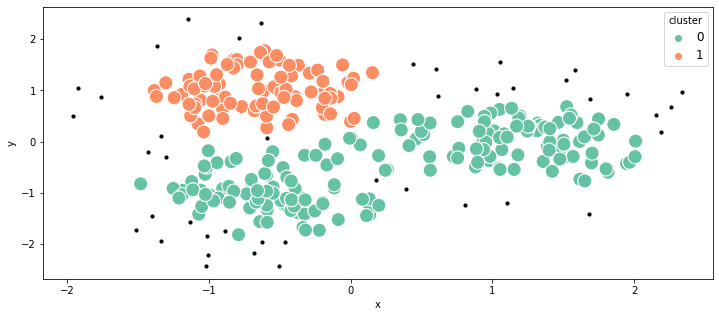

For epsonlle = 0.2 and the minuium point = 6 The average silhouette_score is : -0.006139321756248271


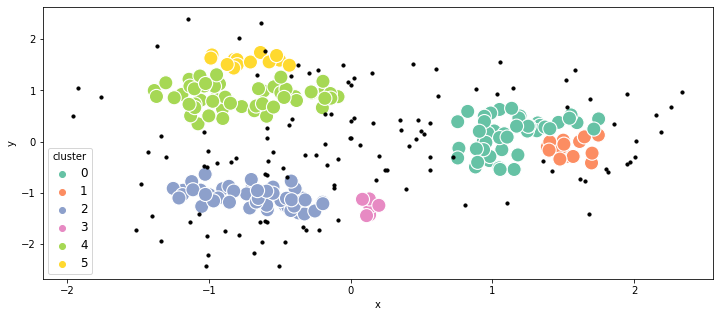

For epsonlle = 0.5 and the minuium point = 5 The average silhouette_score is : 0.21545876112934503


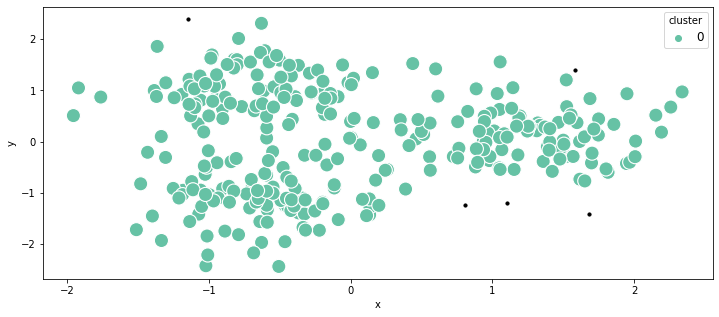

For epsonlle = 0.4 and the minuium point = 5 The average silhouette_score is : 0.2436660989570253


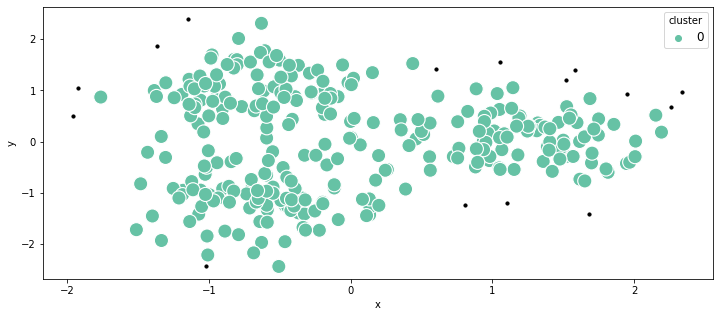

For epsonlle = 0.3 and the minuium point = 5 The average silhouette_score is : 0.19558269852838592


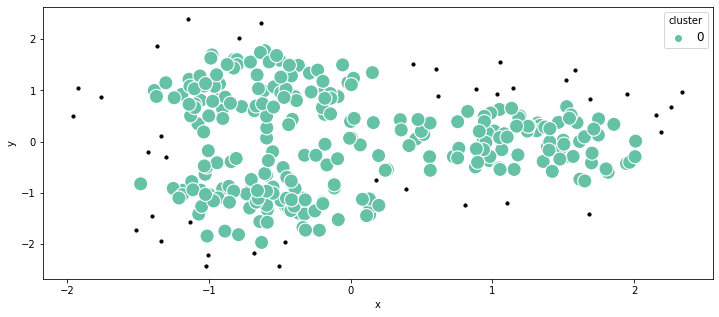

For epsonlle = 0.2 and the minuium point = 5 The average silhouette_score is : 0.05277717160324326


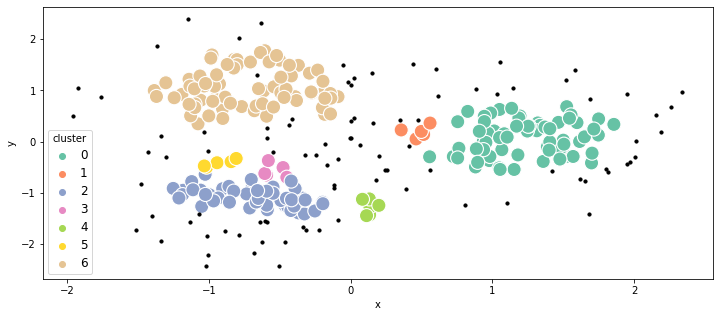

For epsonlle = 0.5 and the minuium point = 4 The average silhouette_score is : 0.2148301619039368


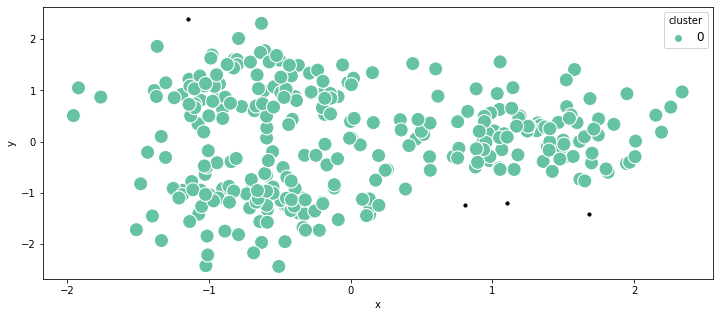

For epsonlle = 0.4 and the minuium point = 4 The average silhouette_score is : 0.21807309234331418


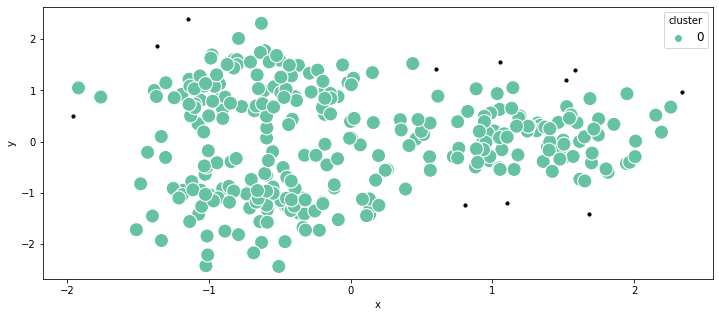

For epsonlle = 0.3 and the minuium point = 4 The average silhouette_score is : 0.2114083110760329


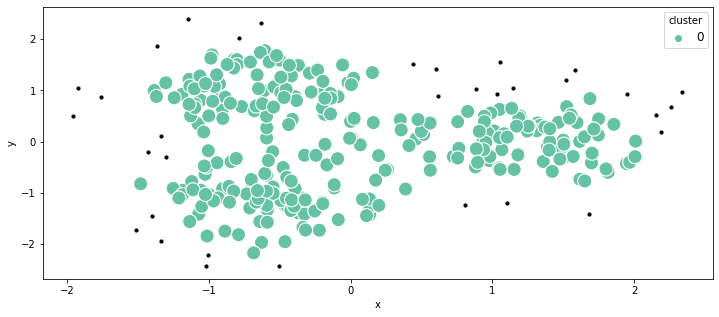

For epsonlle = 0.2 and the minuium point = 4 The average silhouette_score is : 0.14791516934948498


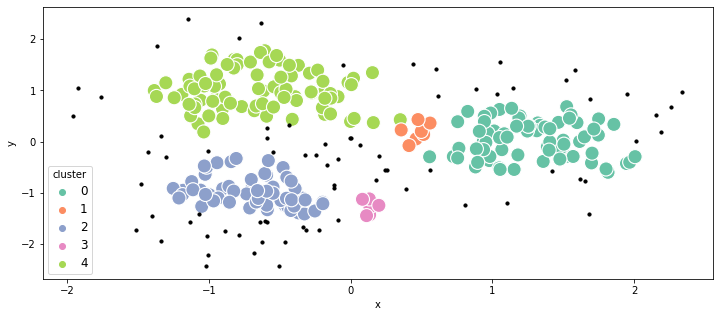

In [ ]:
for min_ in range(9,3,-1):
  for i in range(5,1,-1):
    scan = DBSCAN(eps = i/10, min_samples = min_).fit(d2)
    db_scan=d2.copy() 
    db_scan["cluster"]=scan.labels_
    avg=silhouette_score(d2, db_scan["cluster"]) 
    print("For epsonlle =", i/10,"and the minuium point =",min_ ,"The average silhouette_score is :", avg)

    #vistualize
    outliers = db_scan[db_scan['cluster']==-1]
    fig,(axes) = plt.subplots(1,1,figsize=(12,5))
    axes.legend()
    sns.scatterplot('x', 'y',data=db_scan[db_scan['cluster']!=-1], hue='cluster', ax=axes, palette='Set2', legend='full', s=200)
    axes.scatter(outliers['x'], outliers['y'], s=10, label='outliers', c="k")
    plt.setp(axes.get_legend().get_texts(), fontsize='12')
    plt.show()

In [ ]:
# grab only clustered data points

# overall 


## Dataset 3

In [ ]:
d3 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM3.csv")



For epsonlle = 0.5 and the minuium point = 9 The average silhouette_score is : 0.913619050733588


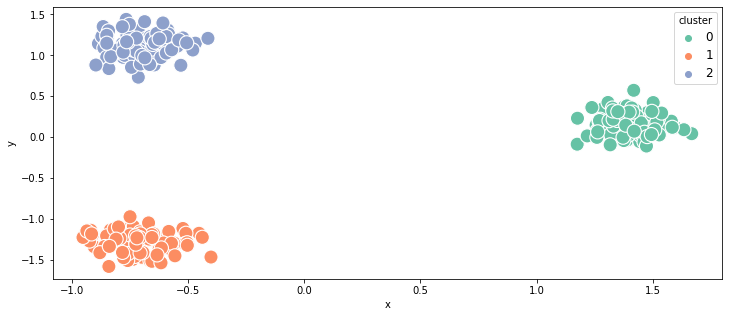

For epsonlle = 0.4 and the minuium point = 9 The average silhouette_score is : 0.913619050733588


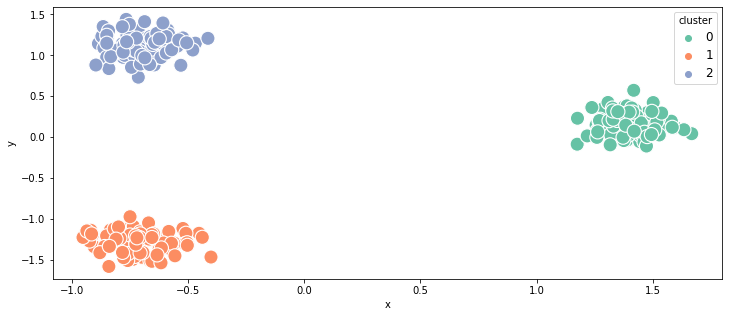

For epsonlle = 0.3 and the minuium point = 9 The average silhouette_score is : 0.913619050733588


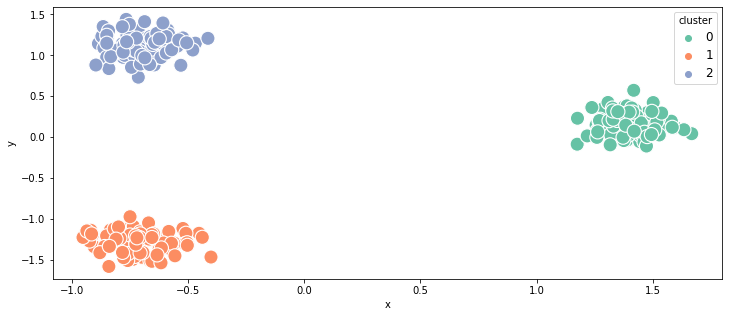

For epsonlle = 0.2 and the minuium point = 9 The average silhouette_score is : 0.913619050733588


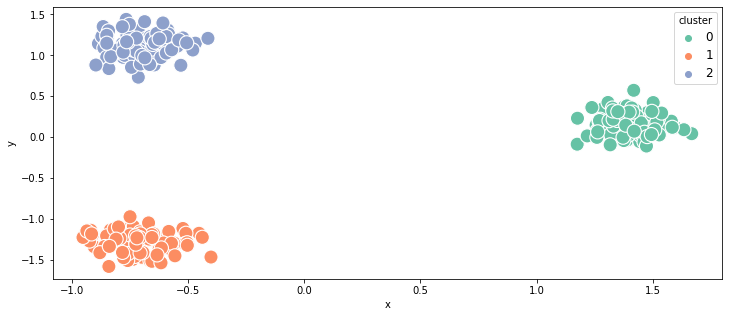

For epsonlle = 0.5 and the minuium point = 8 The average silhouette_score is : 0.913619050733588


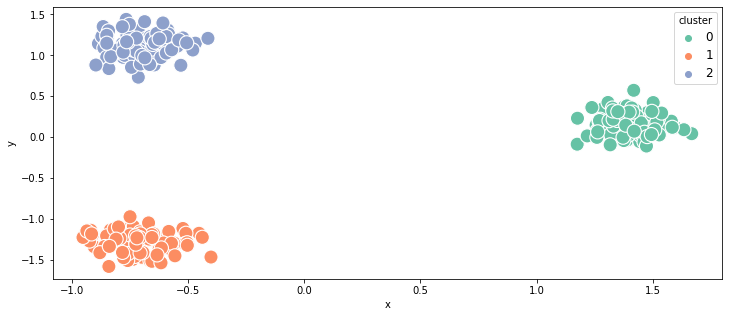

For epsonlle = 0.4 and the minuium point = 8 The average silhouette_score is : 0.913619050733588


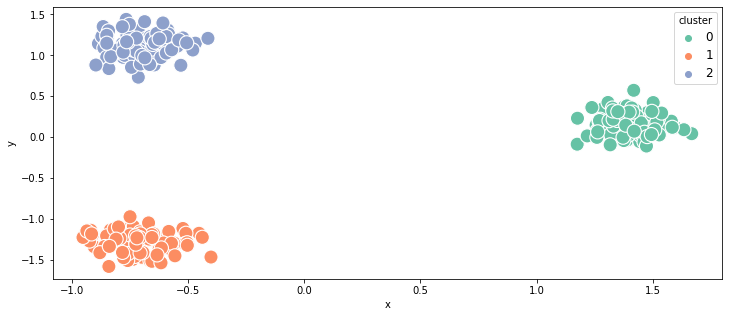

For epsonlle = 0.3 and the minuium point = 8 The average silhouette_score is : 0.913619050733588


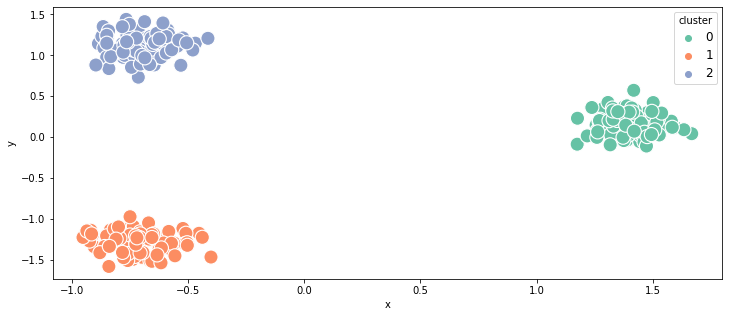

For epsonlle = 0.2 and the minuium point = 8 The average silhouette_score is : 0.913619050733588


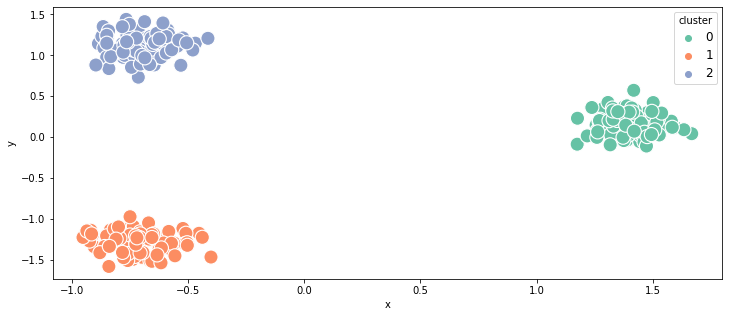

For epsonlle = 0.5 and the minuium point = 7 The average silhouette_score is : 0.913619050733588


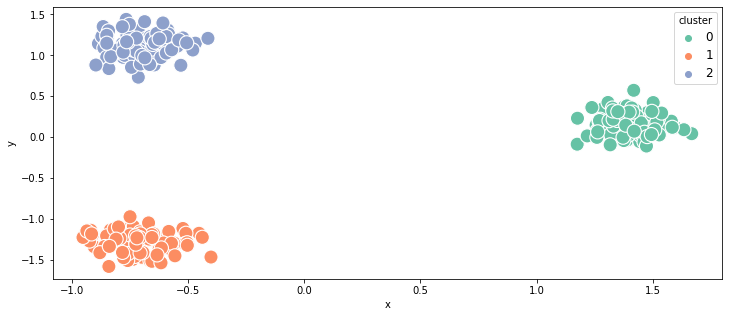

For epsonlle = 0.4 and the minuium point = 7 The average silhouette_score is : 0.913619050733588


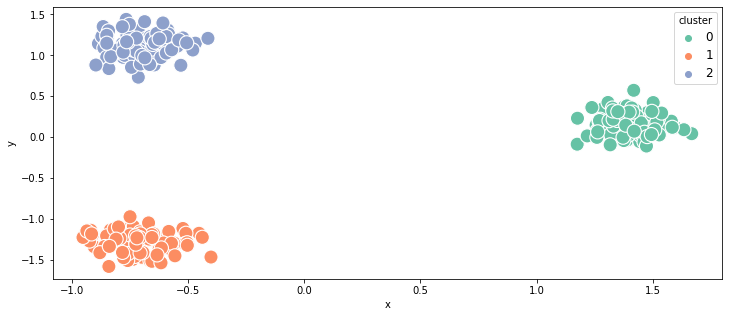

For epsonlle = 0.3 and the minuium point = 7 The average silhouette_score is : 0.913619050733588


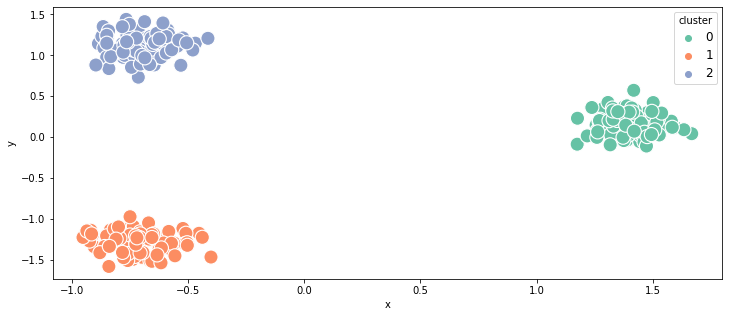

For epsonlle = 0.2 and the minuium point = 7 The average silhouette_score is : 0.913619050733588


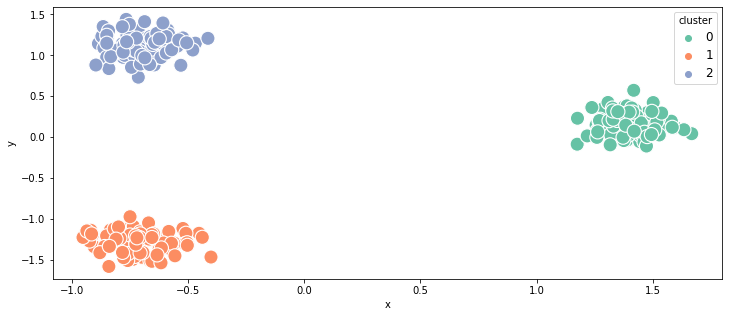

For epsonlle = 0.5 and the minuium point = 6 The average silhouette_score is : 0.913619050733588


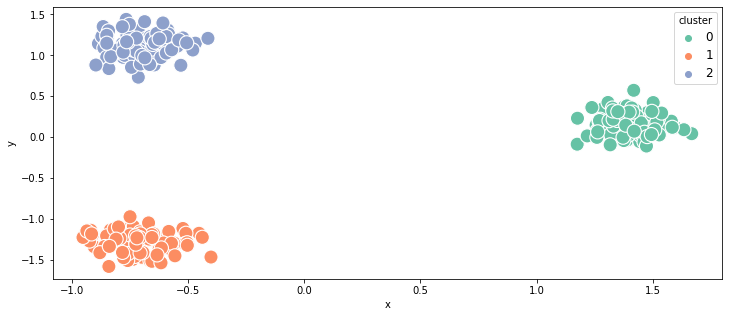

For epsonlle = 0.4 and the minuium point = 6 The average silhouette_score is : 0.913619050733588


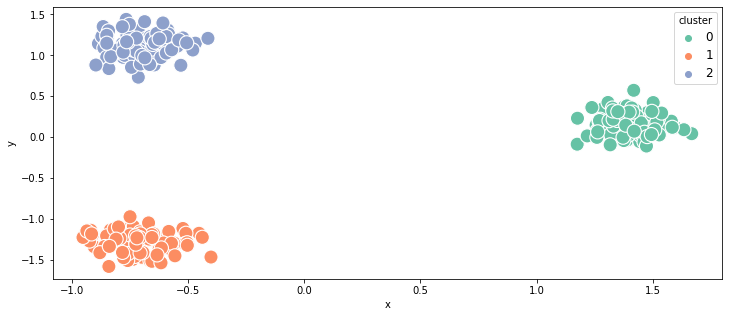

For epsonlle = 0.3 and the minuium point = 6 The average silhouette_score is : 0.913619050733588


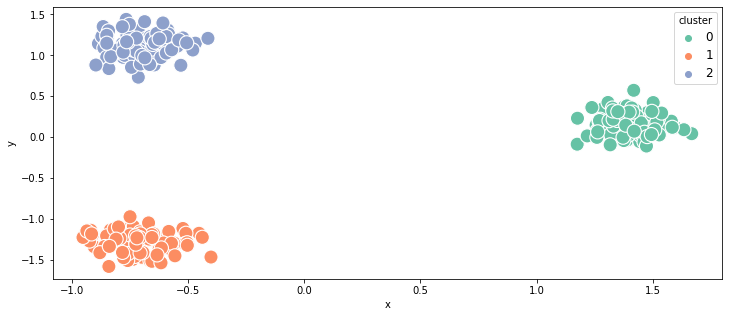

For epsonlle = 0.2 and the minuium point = 6 The average silhouette_score is : 0.913619050733588


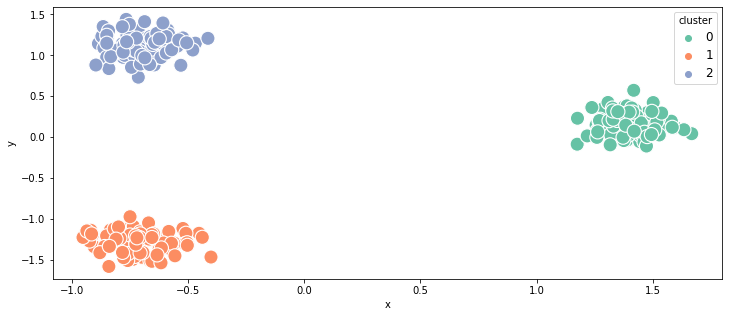

For epsonlle = 0.5 and the minuium point = 5 The average silhouette_score is : 0.913619050733588


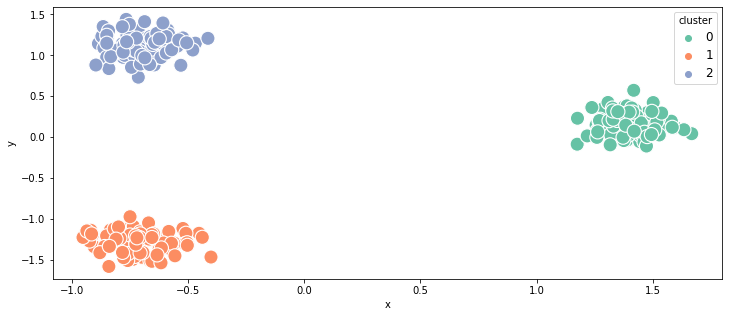

For epsonlle = 0.4 and the minuium point = 5 The average silhouette_score is : 0.913619050733588


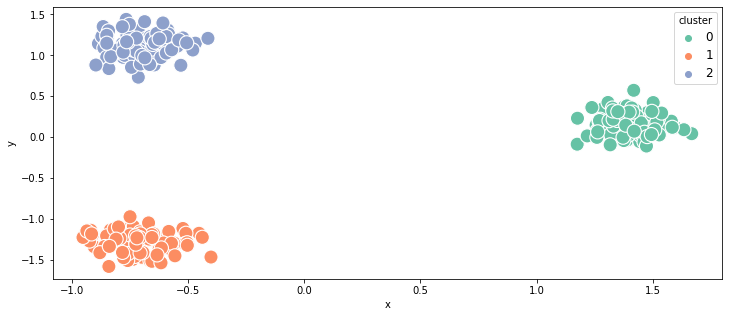

For epsonlle = 0.3 and the minuium point = 5 The average silhouette_score is : 0.913619050733588


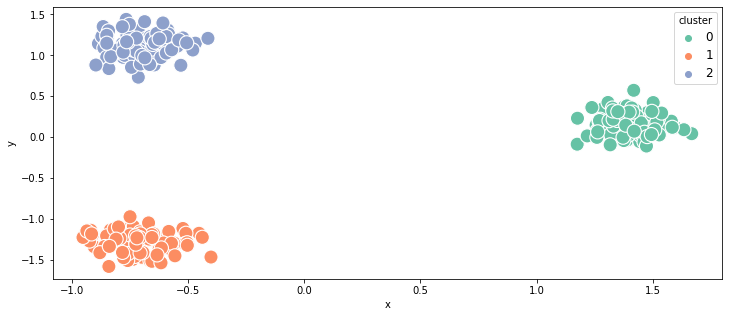

For epsonlle = 0.2 and the minuium point = 5 The average silhouette_score is : 0.913619050733588


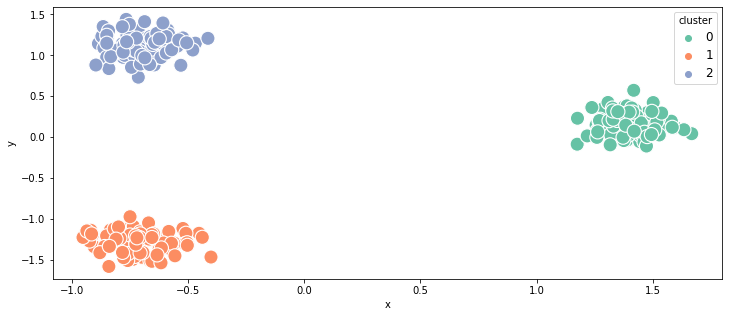

For epsonlle = 0.5 and the minuium point = 4 The average silhouette_score is : 0.913619050733588


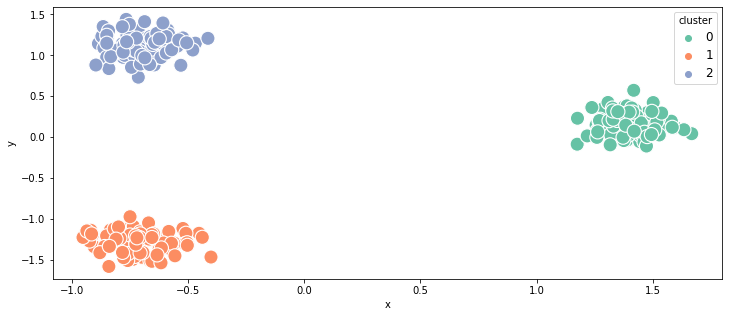

For epsonlle = 0.4 and the minuium point = 4 The average silhouette_score is : 0.913619050733588


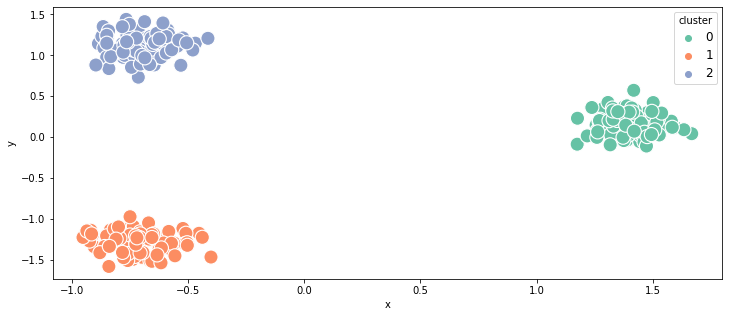

For epsonlle = 0.3 and the minuium point = 4 The average silhouette_score is : 0.913619050733588


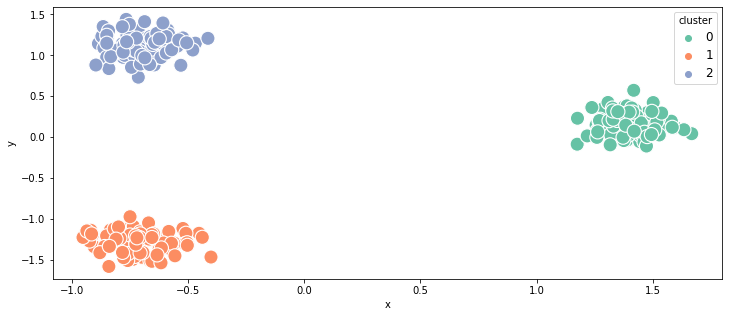

For epsonlle = 0.2 and the minuium point = 4 The average silhouette_score is : 0.913619050733588


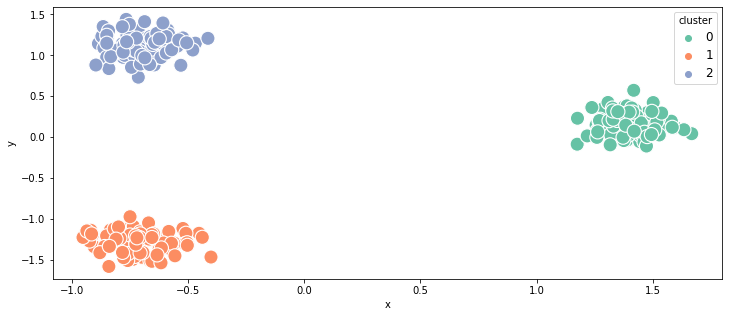

In [ ]:
for min_ in range(9,3,-1):
  for i in range(5,1,-1):
    scan = DBSCAN(eps = i/10, min_samples = min_).fit(d3)
    db_scan=d3.copy() 
    db_scan["cluster"]=scan.labels_
    avg=silhouette_score(d3, db_scan["cluster"]) 
    print("For epsonlle =", i/10,"and the minuium point =",min_ ,"The average silhouette_score is :", avg)

    #vistualize
    outliers = db_scan[db_scan['cluster']==-1]
    fig,(axes) = plt.subplots(1,1,figsize=(12,5))
    axes.legend()
    sns.scatterplot('x', 'y',data=db_scan[db_scan['cluster']!=-1], hue='cluster', ax=axes, palette='Set2', legend='full', s=200)
    axes.scatter(outliers['x'], outliers['y'], s=10, label='outliers', c="k")
    plt.setp(axes.get_legend().get_texts(), fontsize='12')
    plt.show()

In [ ]:
# grab only clustered data points

# overall 


## Dataset 4

In [ ]:
d4 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM4.csv")


In [ ]:
def Db_scan(df):
  for min_ in range(9,3,-1):
    for i in range(5,1,-1):
      scan = DBSCAN(eps = i/10, min_samples = min_).fit(df)
      db_scan=df.copy() 
      db_scan["cluster"]=scan.labels_
      avg=silhouette_score(df, db_scan["cluster"]) 
      print("For epsonlle =", i/10,"and the minuium point =",min_ ,"The average silhouette_score is :", avg)

      #vistualize
      outliers = db_scan[db_scan['cluster']==-1]
      fig,(axes) = plt.subplots(1,1,figsize=(12,5))
      axes.legend()
      sns.scatterplot('x', 'y',data=db_scan[db_scan['cluster']!=-1], hue='cluster', ax=axes, palette='Set2', legend='full', s=200)
      axes.scatter(outliers['x'], outliers['y'], s=10, label='outliers', c="k")
      plt.setp(axes.get_legend().get_texts(), fontsize='12')
      plt.show()

For epsonlle = 0.5 and the minuium point = 9 The average silhouette_score is : 0.2844199212507225


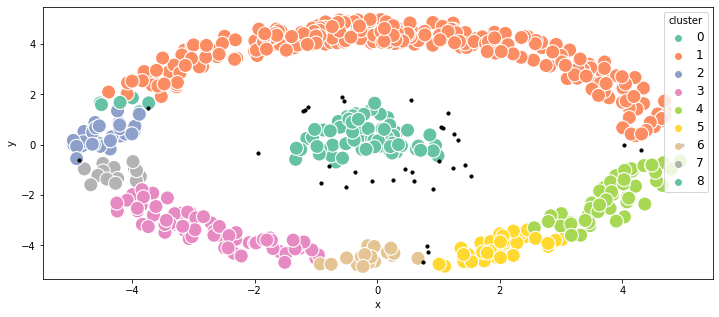

For epsonlle = 0.4 and the minuium point = 9 The average silhouette_score is : 0.0979167256841173


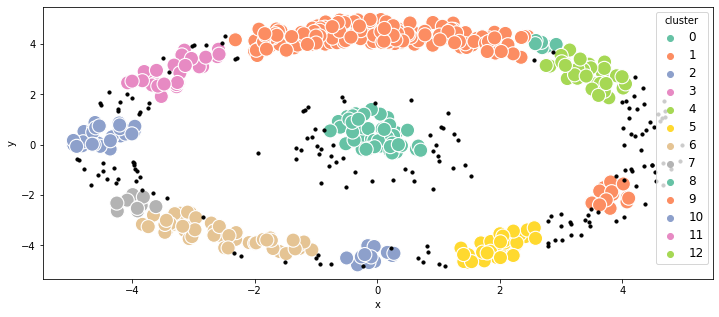

For epsonlle = 0.3 and the minuium point = 9 The average silhouette_score is : -0.156944320980811


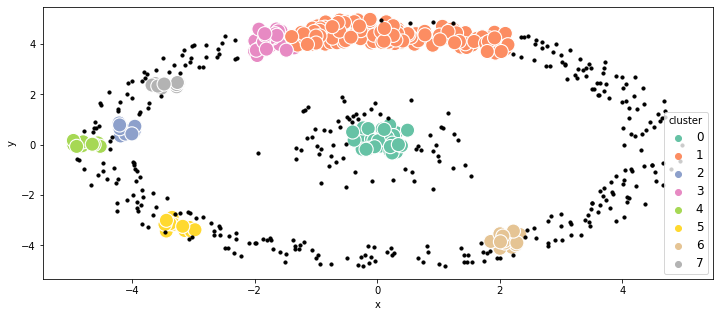

For epsonlle = 0.2 and the minuium point = 9 The average silhouette_score is : -0.12029928424695768


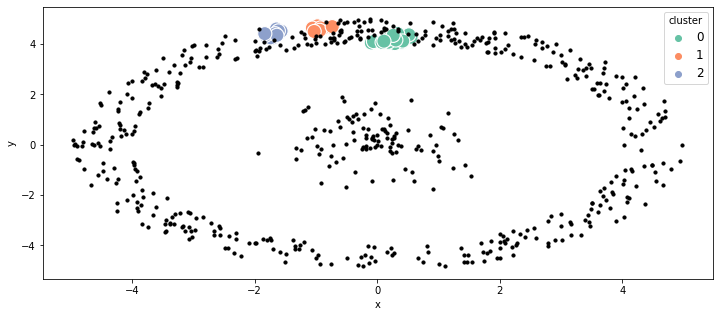

For epsonlle = 0.5 and the minuium point = 8 The average silhouette_score is : 0.24922625710101887


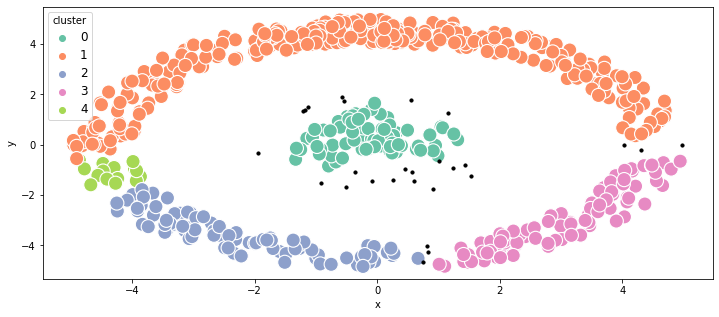

For epsonlle = 0.4 and the minuium point = 8 The average silhouette_score is : 0.22778566017770946


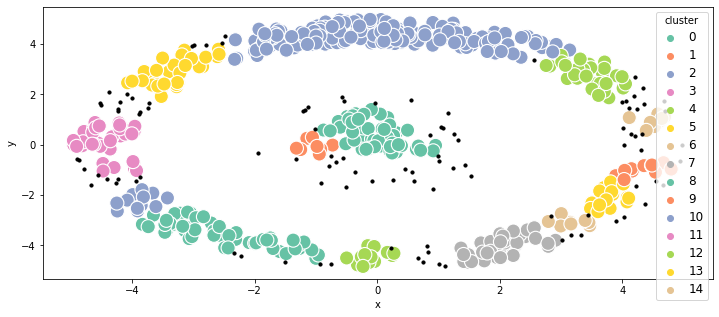

For epsonlle = 0.3 and the minuium point = 8 The average silhouette_score is : -0.17521590495002692


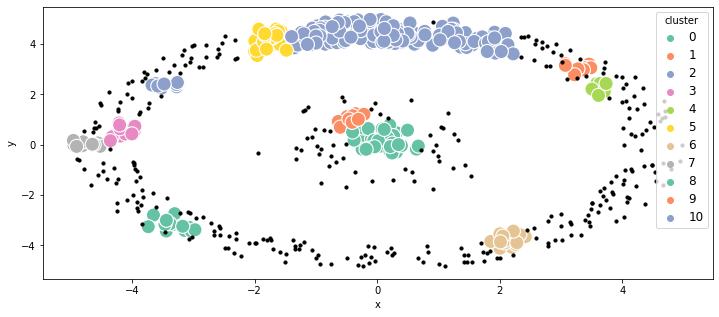

For epsonlle = 0.2 and the minuium point = 8 The average silhouette_score is : -0.31182325472254896


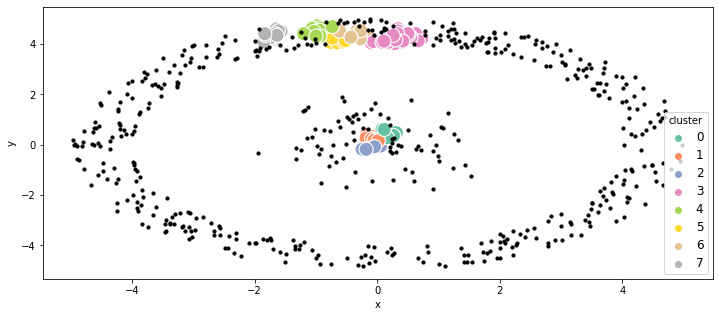

For epsonlle = 0.5 and the minuium point = 7 The average silhouette_score is : 0.3001213538423181


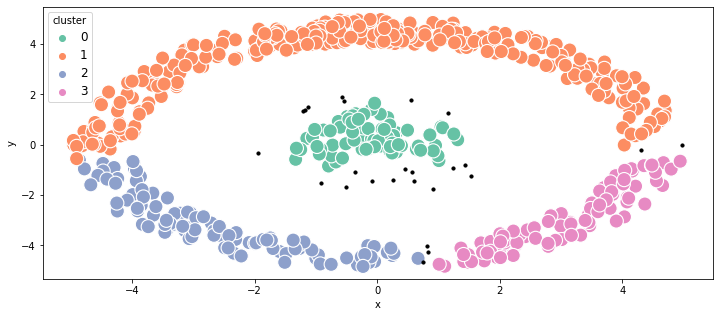

For epsonlle = 0.4 and the minuium point = 7 The average silhouette_score is : 0.28274578152651825


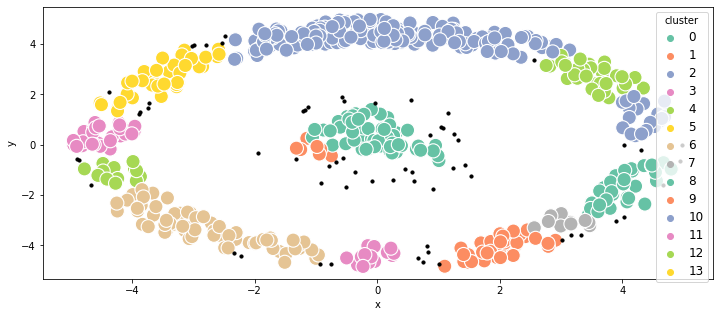

For epsonlle = 0.3 and the minuium point = 7 The average silhouette_score is : -0.08150607414502199


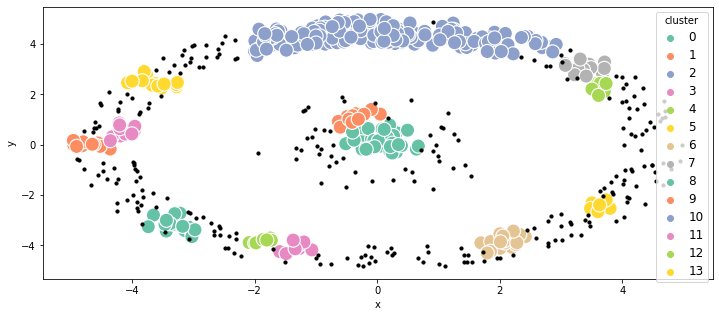

For epsonlle = 0.2 and the minuium point = 7 The average silhouette_score is : -0.3657611464739269


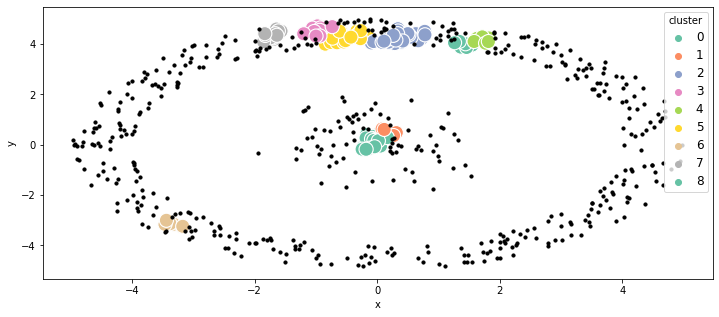

For epsonlle = 0.5 and the minuium point = 6 The average silhouette_score is : 0.17908063449606001


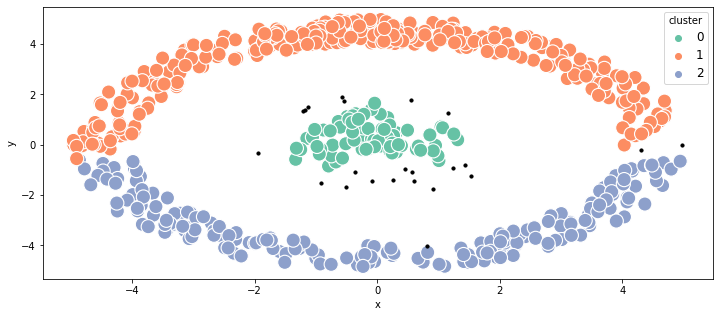

For epsonlle = 0.4 and the minuium point = 6 The average silhouette_score is : 0.3049471902191259


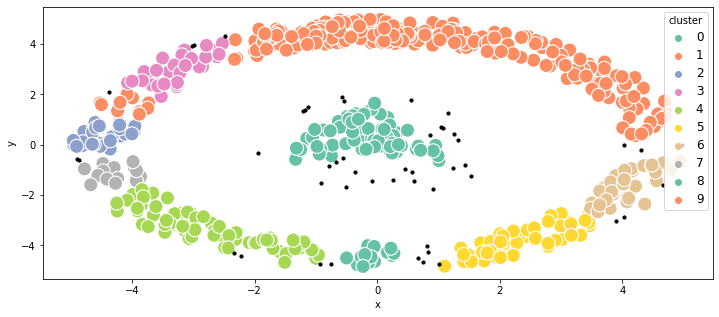

For epsonlle = 0.3 and the minuium point = 6 The average silhouette_score is : 0.009397355895598578


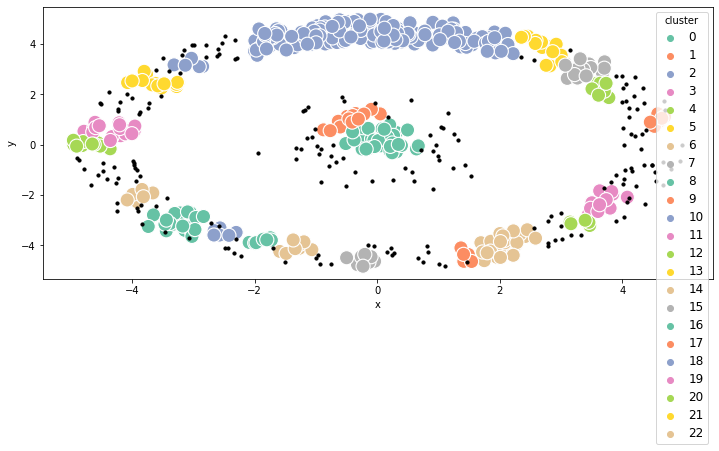

For epsonlle = 0.2 and the minuium point = 6 The average silhouette_score is : -0.36004558813333376


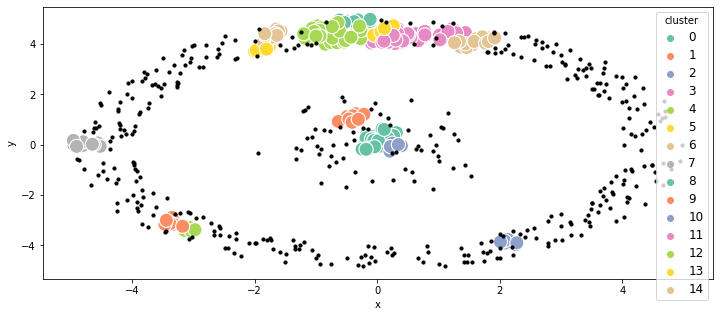

For epsonlle = 0.5 and the minuium point = 5 The average silhouette_score is : -0.16671712248941375


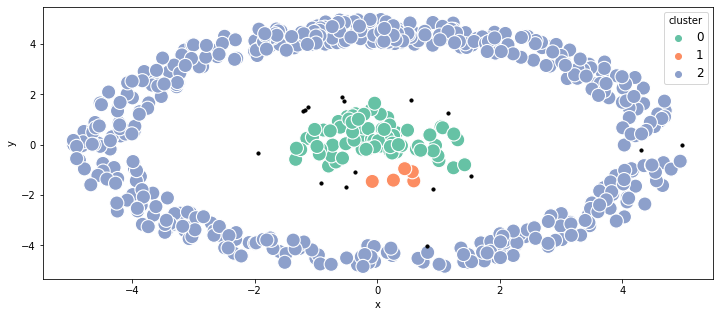

For epsonlle = 0.4 and the minuium point = 5 The average silhouette_score is : 0.18188181267616096


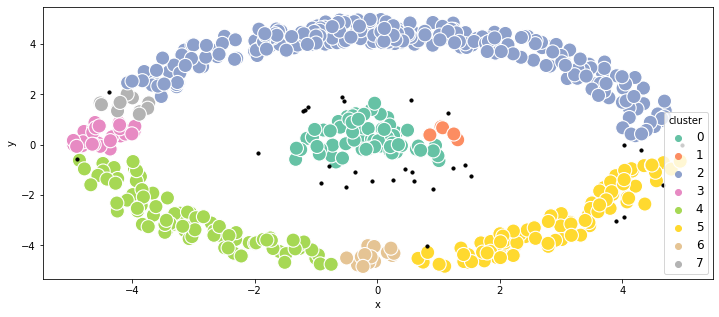

For epsonlle = 0.3 and the minuium point = 5 The average silhouette_score is : 0.14519534084007663


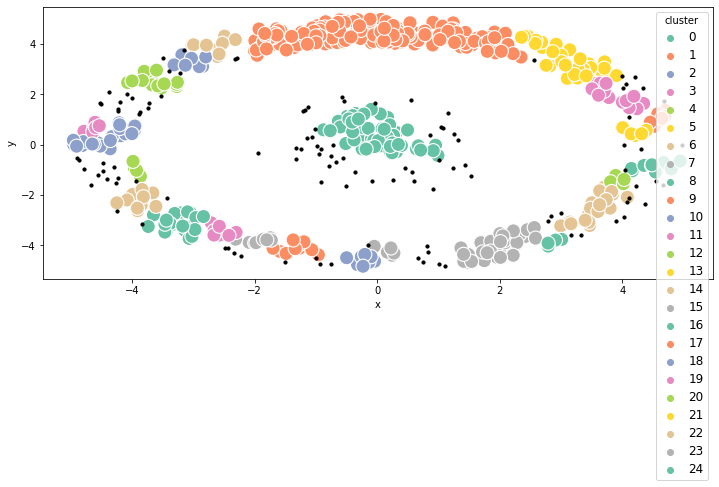

For epsonlle = 0.2 and the minuium point = 5 The average silhouette_score is : -0.27096865395814207


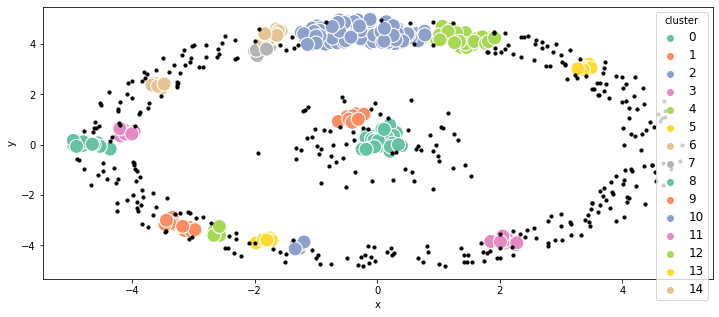

For epsonlle = 0.5 and the minuium point = 4 The average silhouette_score is : -0.1832617593851424


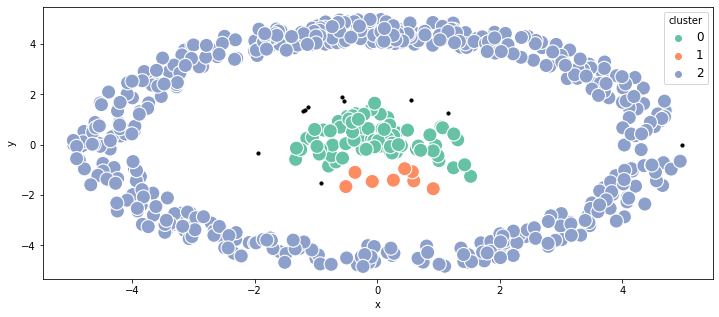

For epsonlle = 0.4 and the minuium point = 4 The average silhouette_score is : 0.23109440468759032


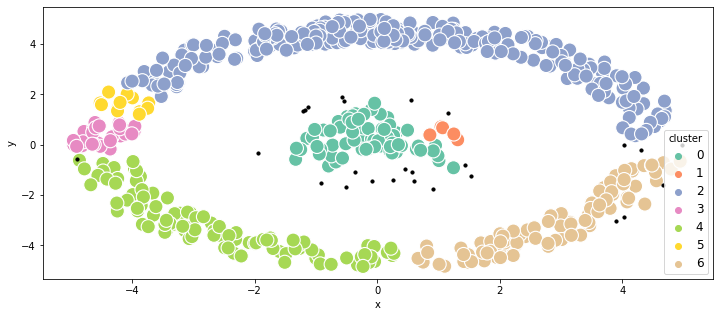

For epsonlle = 0.3 and the minuium point = 4 The average silhouette_score is : 0.1858551368677825


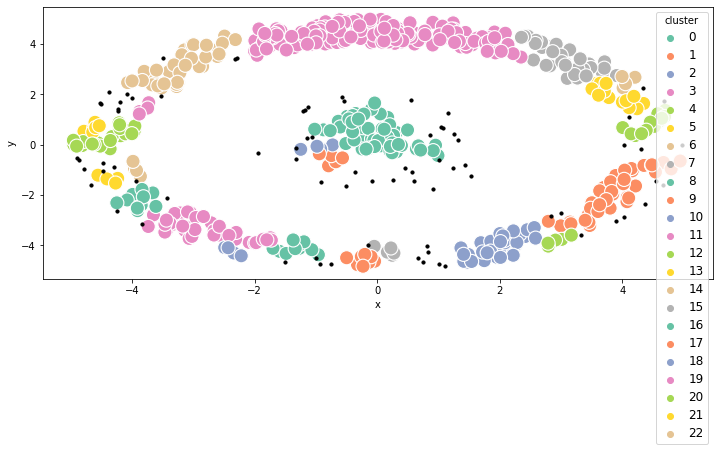

For epsonlle = 0.2 and the minuium point = 4 The average silhouette_score is : -0.1482724520245071


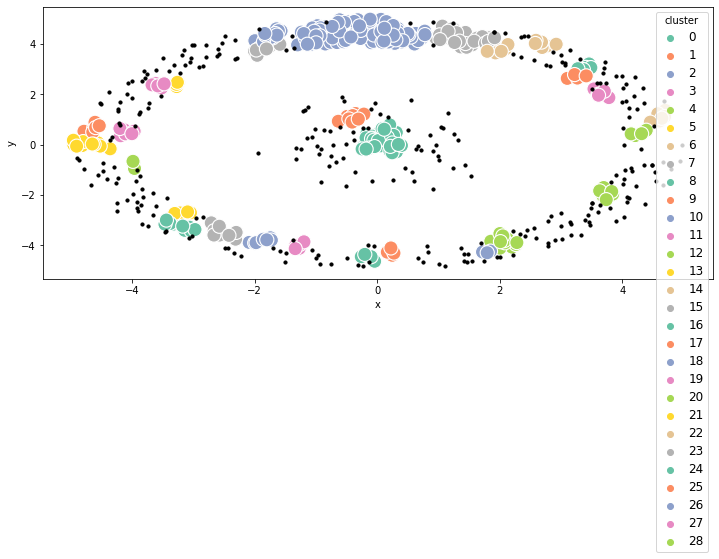

In [ ]:
Db_scan(d4)

In [ ]:
# grab only clustered data points

# overall 


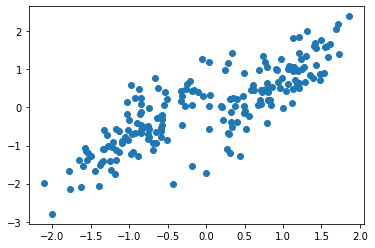

In [ ]:
plt.scatter(x=d1['x'],y=d1['y'])
plt.show()

In [ ]:
def compare(no_cluster,df,min,eps):
    hac =AgglomerativeClustering(no_cluster)
    km = KMeans(no_cluster)
    gm = GaussianMixture(no_cluster)
    scan = DBSCAN(eps = eps, min_samples = min).fit(df)
    db_scan=df.copy()

    hac.fit(df[["x","y"]])
    km.fit(df[["x","y"]])
    gm.fit(df[["x","y"]])
    scan.fit(df[["x","y"]])


    df["hac"] = hac.labels_
    df["km"] = km.labels_
    df["gm"] = gm.predict(df[["x","y"]])
    df["scan"]=scan.labels_


    print(ggplot(df, aes(x = "x", y = "y",
                        color = "factor(hac)")) +
                geom_point() +
                theme_minimal() +
                scale_color_discrete(name = "Cluster Assignment") +
                theme(panel_grid_major = element_blank()) + 
                labs(title = "Hierarchical Agglomeretive"))


    print(ggplot(df, aes(x = "x", y = "y",
                        color = "factor(km)")) +
                geom_point() +
                theme_minimal() +
                scale_color_discrete(name = "Cluster Assignment") +
                theme(panel_grid_major = element_blank()) + 
                labs(title = "KMeans"))


    print(ggplot(df, aes(x = "x", y = "y",
                        color = "factor(gm)")) +
                geom_point() +
                theme_minimal() +
                scale_color_discrete(name = "Cluster Assignment") +
                theme(panel_grid_major = element_blank()) + 
                labs(title = "Gaussian Mixtures"))

    print(ggplot(df, aes(x = "x", y = "y",
                        color = "factor(scan)")) +
                geom_point() +
                theme_minimal() +
                scale_color_discrete(name = "Cluster Assignment") +
                theme(panel_grid_major = element_blank()) +
                 labs(title = "Db-scan"))
    avg=silhouette_score(df, df["scan"]) 
    print("For epsonlle =", i/10,"and the minuium point =",min_ ,"The average silhouette_score is :", avg)
    

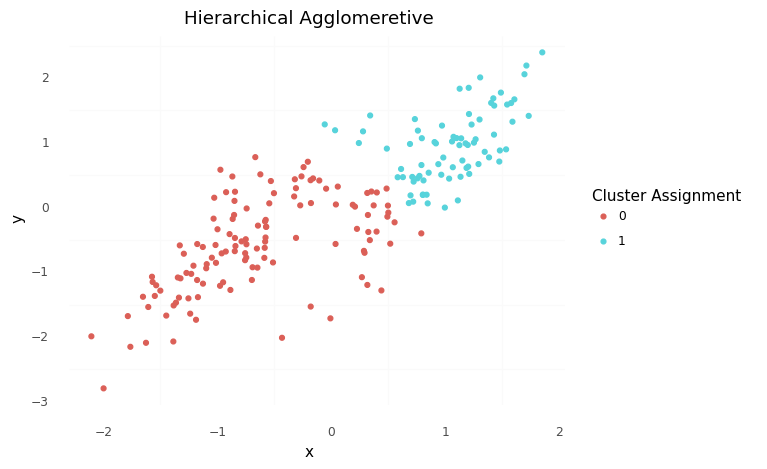

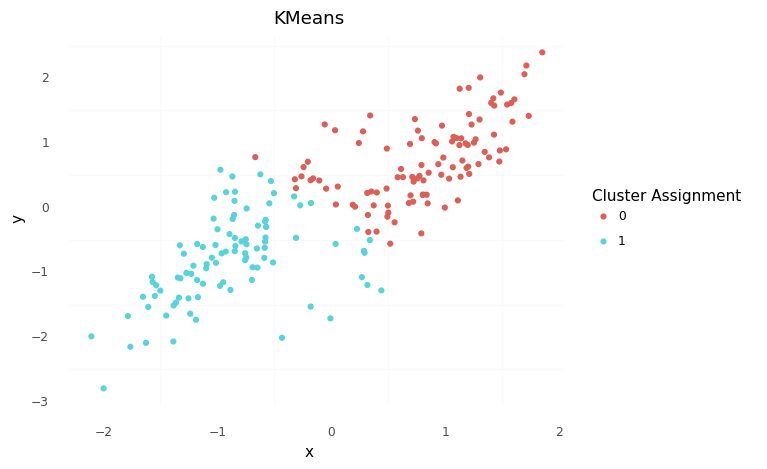

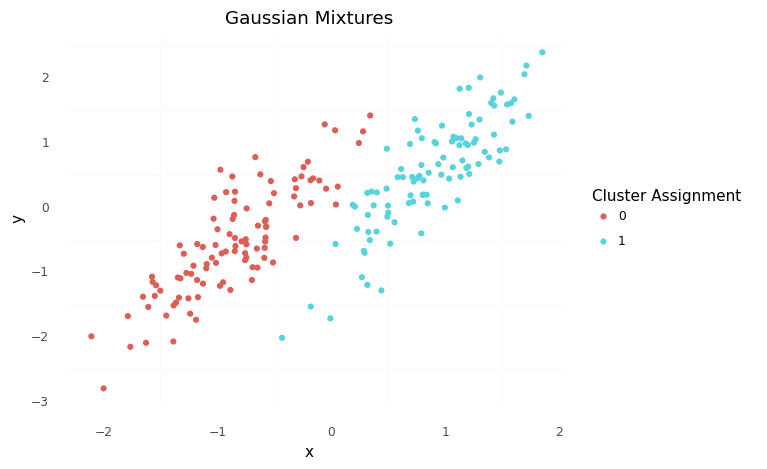

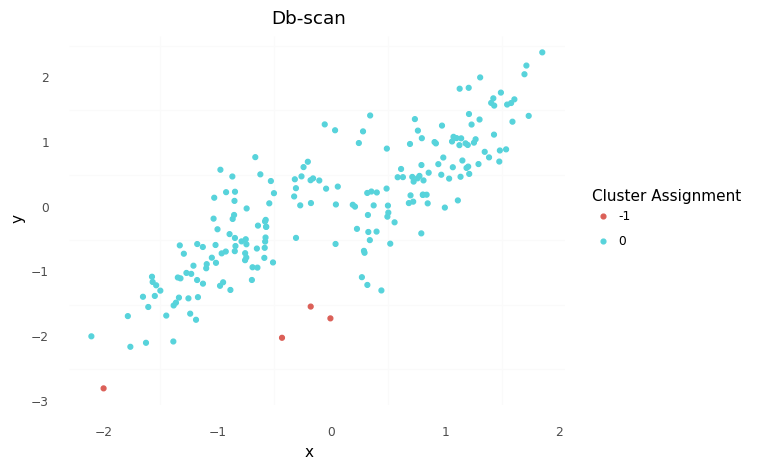


For epsonlle = 1.0 and the minuium point = 4 The average silhouette_score is : 0.2687143898055139


In [ ]:
compare(2,d1,5,0.5)

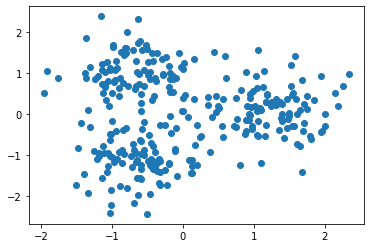

In [ ]:
plt.scatter(x=d2['x'],y=d2['y'])
plt.show()

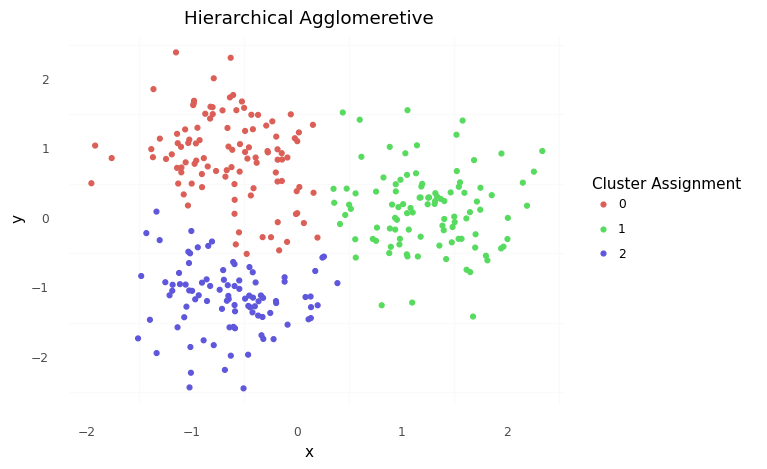

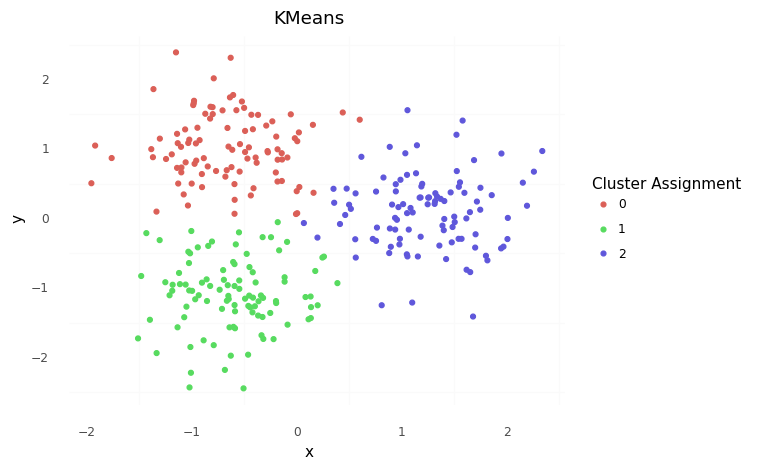

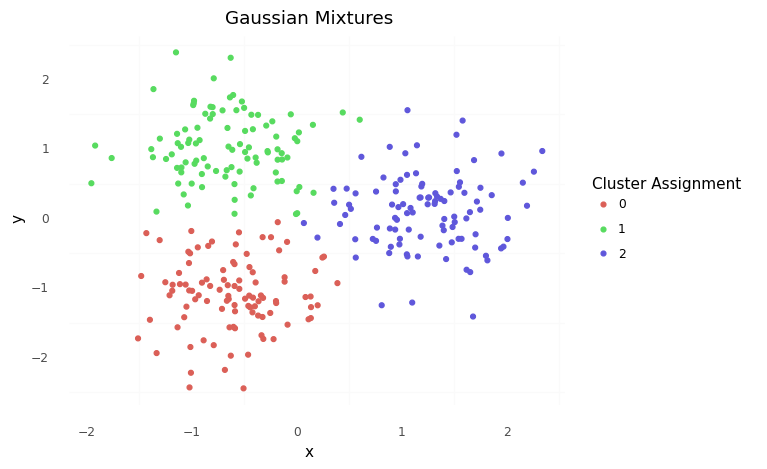

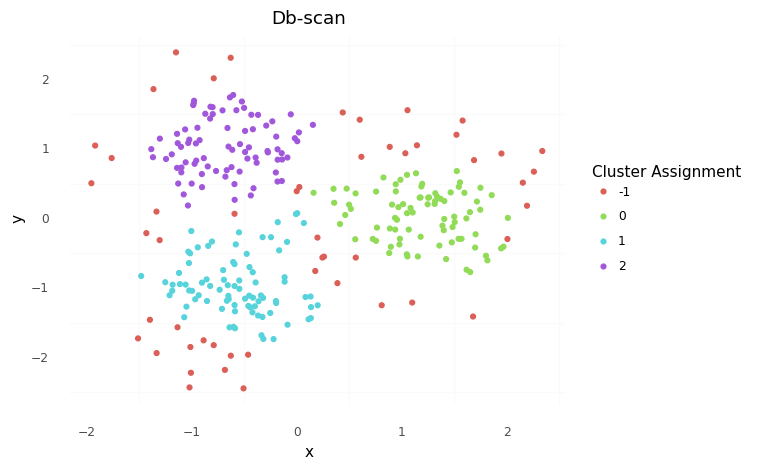


For epsonlle = 1.0 and the minuium point = 4 The average silhouette_score is : 0.5596572890384349


In [ ]:
compare(3,d2,7,0.3)

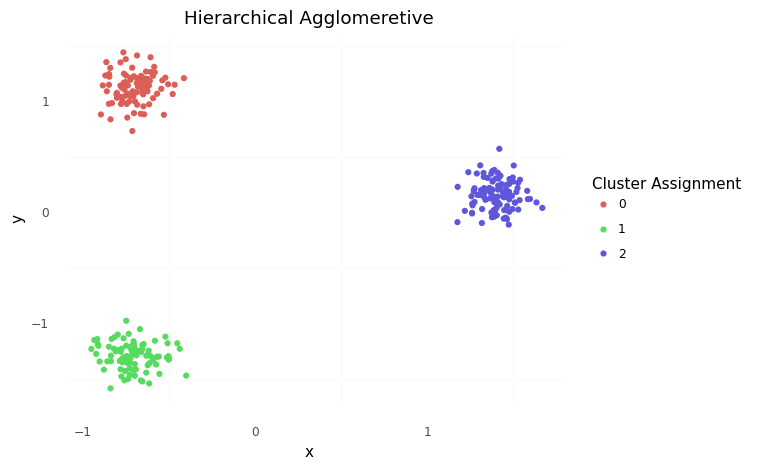

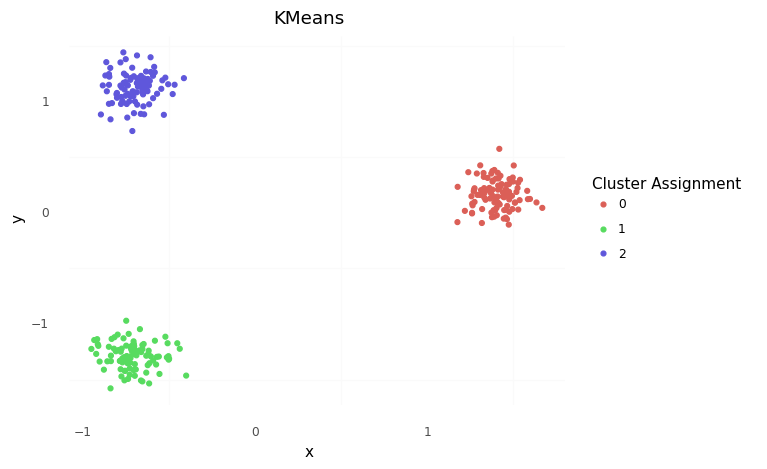

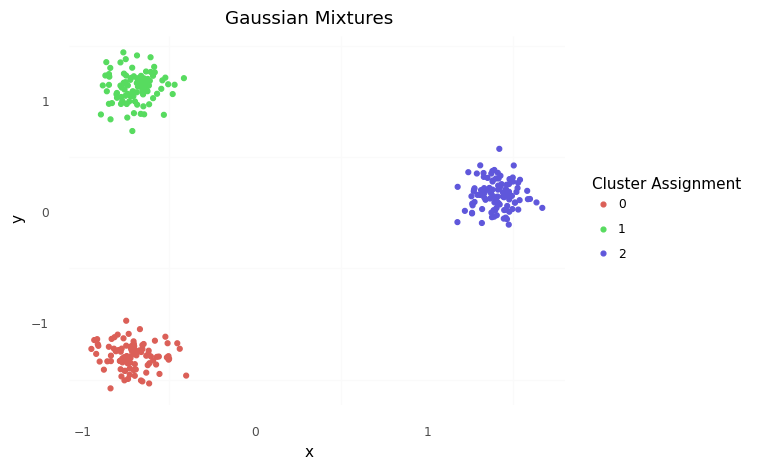

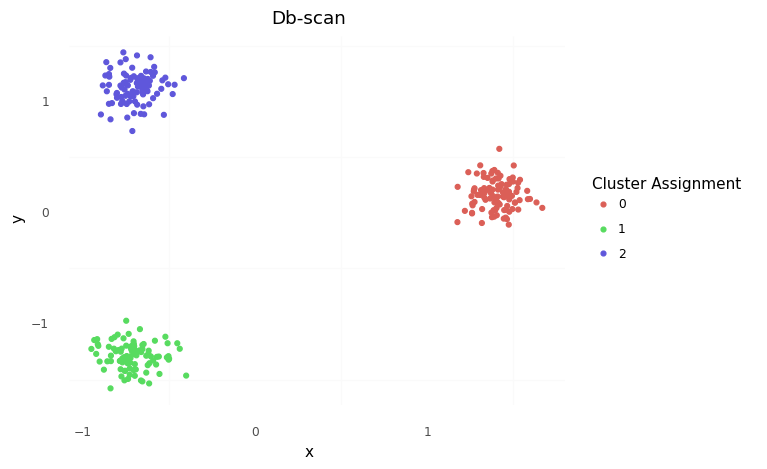


For epsonlle = 1.0 and the minuium point = 4 The average silhouette_score is : 0.9389418019947724


In [ ]:
compare(3,d3,4,0.3)

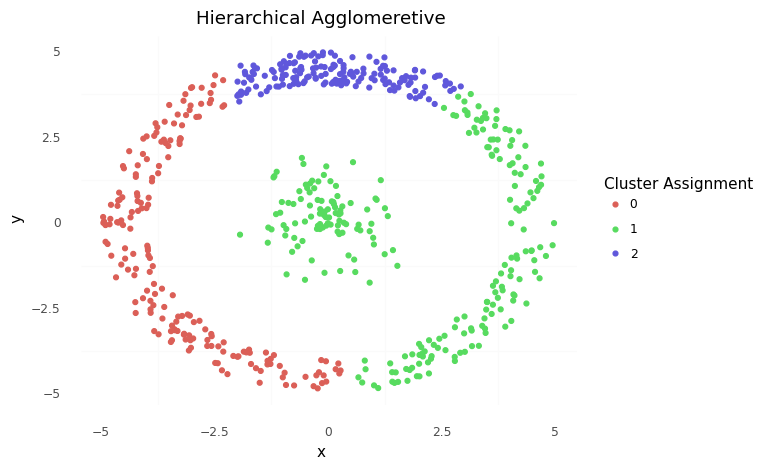

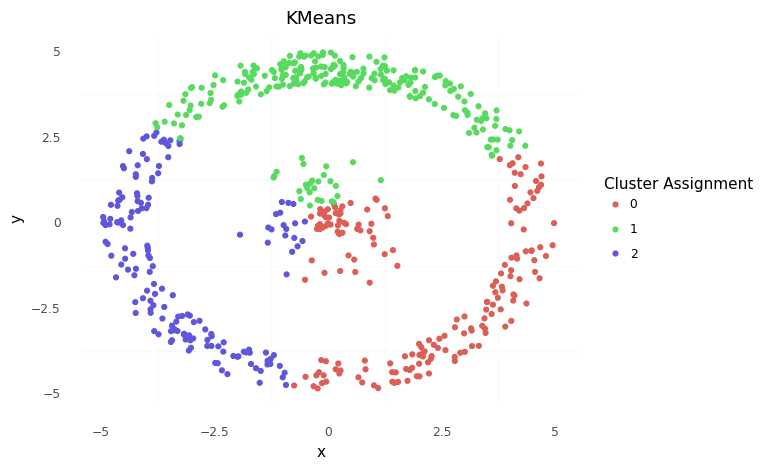

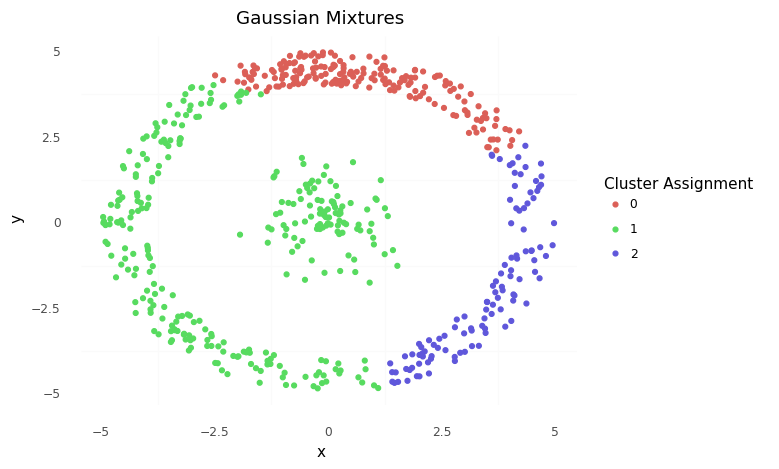

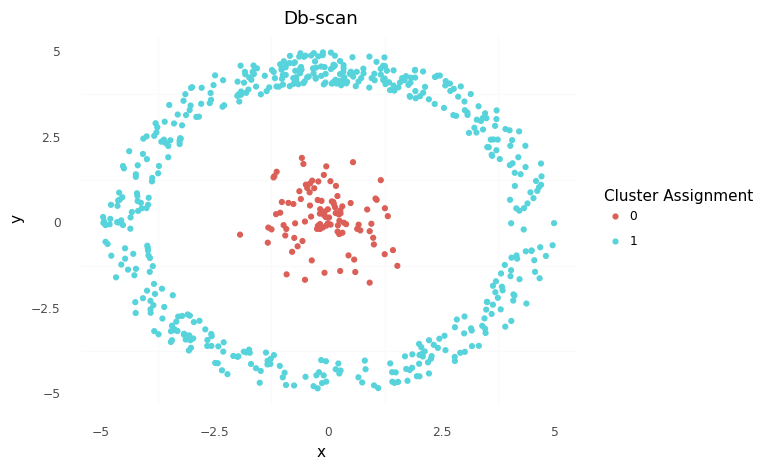


For epsonlle = 1.0 and the minuium point = 4 The average silhouette_score is : -0.023592906303743152


In [ ]:
compare(3,d4,5,2)

### Compare

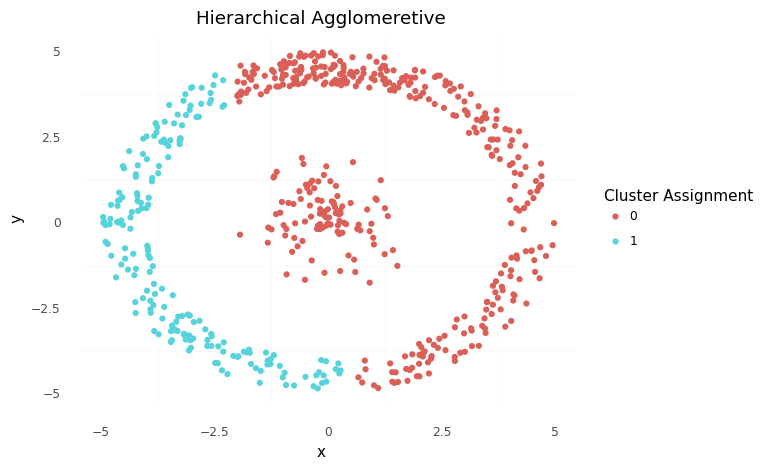

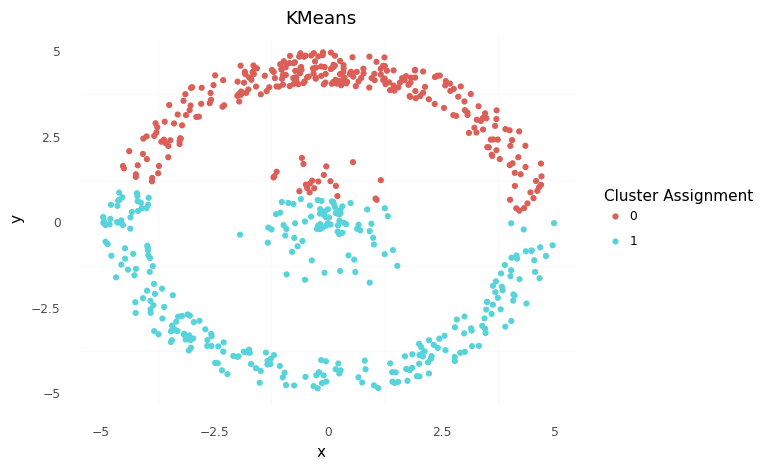

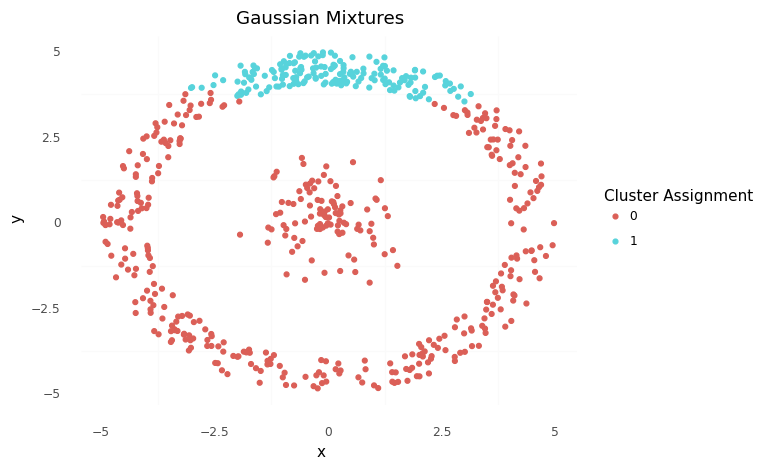

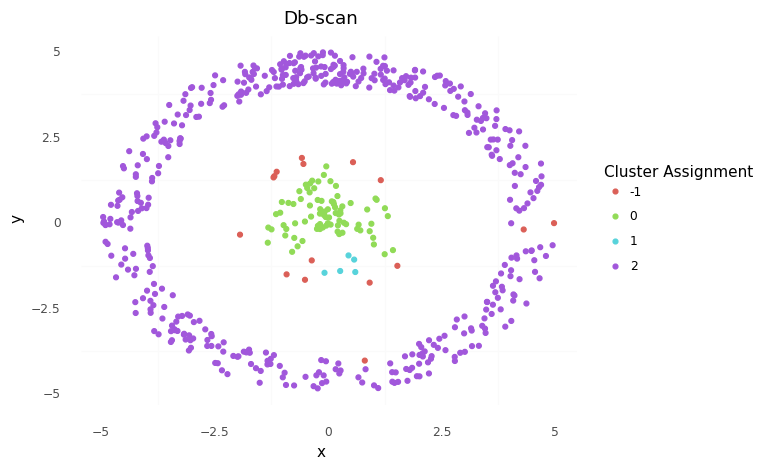

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

hac = AgglomerativeClustering(2)
km = KMeans(2)
gm = GaussianMixture(2)
scan = DBSCAN(eps = 0.5, min_samples = 5).fit(d4)
db_scan=d4.copy()

hac.fit(d4[["x","y"]])
km.fit(d4[["x","y"]])
gm.fit(d4[["x","y"]])
scan.fit(d4[["x","y"]])


d4["hac"] = hac.labels_
d4["km"] = km.labels_
d4["gm"] = gm.predict(d4[["x","y"]])
d4["scan"]=scan.labels_


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))

print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(scan)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Db-scan"))

## Dataset 5

In [ ]:
d5 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM5.csv")


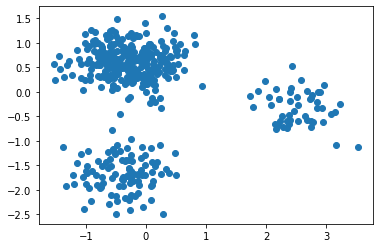

In [ ]:
plt.scatter(x=d5['x'],y=d5['y'])
plt.show()

For epsonlle = 0.5 and the minuium point = 15 The average silhouette_score is : 0.6714107830551044


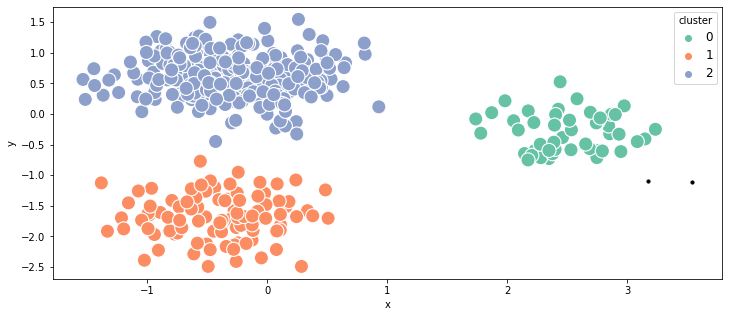

In [ ]:
scan = DBSCAN(eps = 0.5, min_samples = 15).fit(d5)
db_scan=d5.copy() 
db_scan["cluster"]=scan.labels_
avg=silhouette_score(d5, db_scan["cluster"]) 
print("For epsonlle =", 0.5,"and the minuium point =",15 ,"The average silhouette_score is :", avg)

#vistualize
outliers = db_scan[db_scan['cluster']==-1]
fig,(axes) = plt.subplots(1,1,figsize=(12,5))
axes.legend()
sns.scatterplot('x', 'y',data=db_scan[db_scan['cluster']!=-1], hue='cluster', ax=axes, palette='Set2', legend='full', s=200)
axes.scatter(outliers['x'], outliers['y'], s=10, label='outliers', c="k")
plt.setp(axes.get_legend().get_texts(), fontsize='12')
plt.show()


In [ ]:
# grab only clustered data points

# overall 


# Elbow Method

Read more [here](https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf) if math excites you.

## Dataset 6

In [ ]:
d6 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM6.csv")


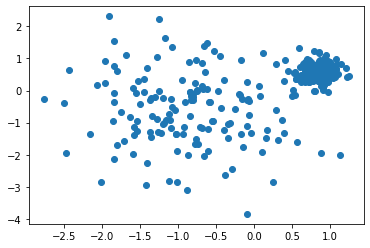

In [ ]:
plt.scatter(x=d6['x'],y=d6['y'])
plt.show()

In [ ]:
# we ask for 4 nearest, because the data point it self (distance = 0) is included


[598.0000000000002, 245.45139384642772, 146.91828825139729, 118.35551020726545, 93.64727692717375, 76.20120973067182, 63.1197064044327, 56.5930121249926, 50.57862885667371, 46.07108781452114]


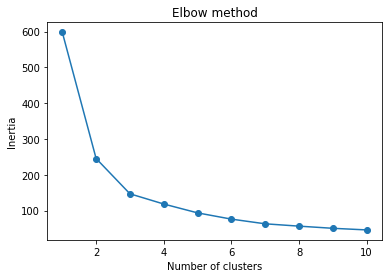

In [ ]:
from sklearn.cluster import KMeans
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(d6)
    inertias.append(kmeans.inertia_)


print(inertias)
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show() 

In [ ]:
# sort the distances


In [ ]:
#plot the distances


In [ ]:
# grab only clustered data points


# overall 
